[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/4.3%20ETF%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%8B%9C%EA%B0%81%ED%99%94-output.ipynb)


## ETF 분석과 시각화

* keyword
    * seaborn - barplot, boxplot, violinplot
    * **seaborn PairGrid vs matplotlib - subplots**
    * seaborn FacetGrid
        * **catplot 범주형 데이터 시각화 (kind: count, bar, box, boxen, violin)**
        * relplot 연속된 수치 데이터 시각화 (kind: scatter, line) <= KRX 전체 종목 분석에서 다룸
    * pandas - value_counts, cross_tab, groupby, pivot_table
  
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

* seaborn 에 대해 좀 더 알고 싶다면 다음의 튜토리얼을 참고해 보세요.
* [User guide and tutorial — seaborn documentation](https://seaborn.pydata.org/tutorial.html)



* 특정 시점의 데이터를 저장해 분석합니다.
* 분석하는 시점에 따라 내용이 달라지는 점에 유의하세요!
* 내가 수집한 시점의 데이터를 분석하기 때문에 매일 분석한다면 일자별 리포트를 만들어 볼 수도 있을거에요.
* [ETF : 네이버 금융](https://finance.naver.com/sise/etf.nhn)


## ⚠️ 주의사항 ⚠️ 
*  분석내용은 데이터 수집 시점에 따라 달라집니다.

## 라이브러리 로드

In [1]:
# 필요한 도구를 로드합니다.
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# seaborn 의 버전을 확인합니다. 
# 0.11.0 이상의 버전에서 변경된 내용이 많으니 0.11 이상의 버전을 사용해 주세요.
sns.__version__

'0.11.0'

In [3]:
pd.__version__

'1.0.4'

## 시각화를 위한 한글폰트 설정

In [4]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [5]:
# 사용가능한 그래프 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [6]:
# 운영체제에 맞는 font_family 찾기 
font_family = get_font_family()
font_family

'AppleGothic'

In [7]:
# 그래프 스타일 설정
# plt.style.use("fivethirtyeight")
# plt.style.use("bmh")

# dark mode 사용자를 위한 스타일 추천
# plt.style.use("dark_background")
plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

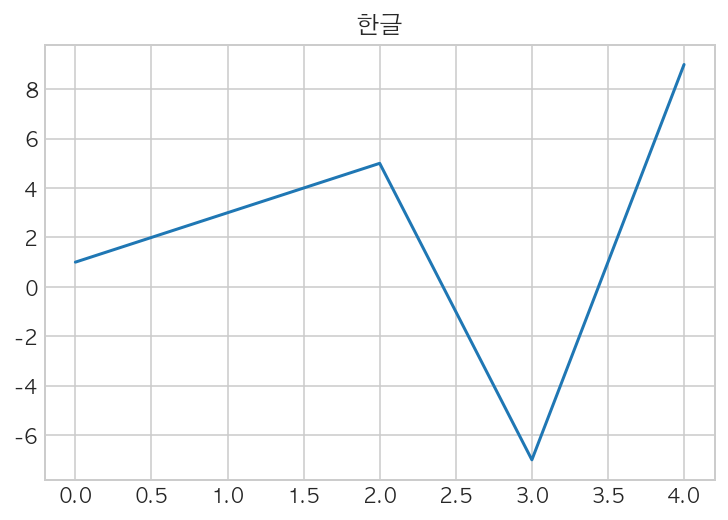

In [8]:
# 한글폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

## 데이터 로드

In [9]:
# 이전 수업에서 수집해서 저장해둔 csv 파일을 읽어옵니다.
# itemcode 숫자 앞의 0 이 지워진다면 
# dtype={"종목코드": np.object} 로 타입을 지정해 주면 문자형태로 읽어옵니다.
df = pd.read_csv('eft_2021-01-20.csv', dtype={"종목코드":np.object})
df.shape

(469, 17)

In [10]:
# 인덱스 번호 상단 5개의 데이터를 가져옵니다.
# 제대로 read되었는지 각 column정보들을 확인합니다.
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,42900,2,245,0.57,43035.0,36.4960,8821471,377823,54998,국내 시장지수,KODEX,False,False,False
1,102110,1,TIGER 200,42890,2,260,0.61,43020.0,36.5689,1128766,48252,28350,국내 시장지수,TIGER,False,False,False
2,252670,3,KODEX 200선물인버스2X,2090,5,-25,-1.18,2092.0,-48.6651,392883693,823890,19602,국내 파생,KODEX,True,False,False
3,153130,6,KODEX 단기채권,102665,2,5,0.00,102665.0,0.1365,17589,1805,18467,채권,KODEX,False,False,False
4,122630,3,KODEX 레버리지,27680,2,295,1.08,27870.0,83.6686,43815864,1209174,18380,국내 파생,KODEX,False,True,False


In [11]:
# 인덱스 하단의 5개 데이터를 가져옵니다.
# 데이터가 제대로 로드되었는지 확인합니다.
df.tail()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
464,285010,2,KBSTAR 200중공업,8960,5,-50,-0.55,8975.0,22.8357,607,5,23,국내 업종/테마,KBSTAR,False,False,False
465,287310,2,KBSTAR 200경기소비재,12570,2,120,0.96,12572.0,44.5153,12435,159,23,국내 업종/테마,KBSTAR,False,False,False
466,334700,5,KBSTAR 팔라듐선물인버스(H),5200,3,0,0.00,NaN,-2.6218,1234,6,21,원자재,KBSTAR,True,False,True
467,267500,4,KBSTAR 미국장기국채선물인버스2X(합성 H),5990,5,-110,-1.80,NaN,9.2211,1838,11,18,해외 주식,KBSTAR,True,False,True
468,285020,2,KBSTAR 200철강소재,7470,5,-10,-0.13,7502.0,29.7484,20919,154,18,국내 업종/테마,KBSTAR,False,False,False


In [12]:
# info를 통해서 각 column들의 데이터타입과 결측치, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   종목코드        469 non-null    object 
 1   탭코드         469 non-null    int64  
 2   종목명         469 non-null    object 
 3   현재가         469 non-null    int64  
 4   등락구분        469 non-null    int64  
 5   전일비         469 non-null    int64  
 6   등락률         469 non-null    float64
 7   순자산가치(NAV)  341 non-null    float64
 8   3개월수익률      448 non-null    float64
 9   거래량         469 non-null    int64  
 10  거래대금(백만)    469 non-null    int64  
 11  시가총액(억)     469 non-null    int64  
 12  유형          469 non-null    object 
 13  브랜드         469 non-null    object 
 14  인버스         469 non-null    bool   
 15  레버리지        469 non-null    bool   
 16  환헤지H        469 non-null    bool   
dtypes: bool(3), float64(3), int64(7), object(4)
memory usage: 52.8+ KB


## 결측치 확인

In [14]:
# 결측치를 확인합니다.
df.isnull().sum()

종목코드            0
탭코드             0
종목명             0
현재가             0
등락구분            0
전일비             0
등락률             0
순자산가치(NAV)    128
3개월수익률         21
거래량             0
거래대금(백만)        0
시가총액(억)         0
유형              0
브랜드             0
인버스             0
레버리지            0
환헤지H            0
dtype: int64

In [15]:
# 결측치의 비율을 봅니다.
df.isnull().mean() * 100

종목코드           0.000000
탭코드            0.000000
종목명            0.000000
현재가            0.000000
등락구분           0.000000
전일비            0.000000
등락률            0.000000
순자산가치(NAV)    27.292111
3개월수익률         4.477612
거래량            0.000000
거래대금(백만)       0.000000
시가총액(억)        0.000000
유형             0.000000
브랜드            0.000000
인버스            0.000000
레버리지           0.000000
환헤지H           0.000000
dtype: float64

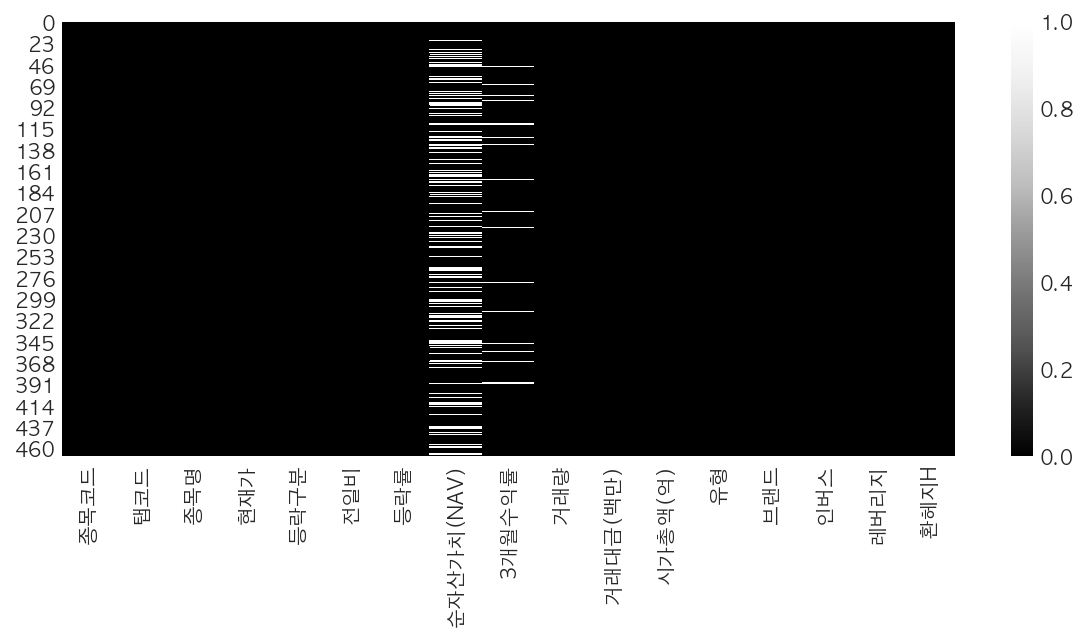

In [16]:
# heatmap을 통한 결측치 시각화
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cmap="Greys_r")

## 범주형 데이터의 빈도수
### 범주형 변수 찾기

In [17]:
# describe를 통해 범주형 변수에 대한 기술통계 값을 구하기
# df.describe(include=np.object)
df.describe(exclude=np.number)

,종목코드,종목명,유형,브랜드,인버스,레버리지,환헤지H
count,469,469,469,469,469,469,469
unique,469,469,7,15,2,2,2
top,138910,KODEX 혁신기술테마액티브,국내 업종/테마,TIGER,False,False,False
freq,1,1,174,128,425,435,405


In [18]:
# unique(중복을 제외한 값)에 대한 빈도수 구하기
# object type 이 아니더라도 nunique 값이 작다면 범주형 변수인지 확인해 봅니다.
df.nunique()

종목코드          469
탭코드             7
종목명           469
현재가           448
등락구분            3
전일비           126
등락률           252
순자산가치(NAV)    336
3개월수익률        448
거래량           436
거래대금(백만)      291
시가총액(억)       312
유형              7
브랜드            15
인버스             2
레버리지            2
환헤지H            2
dtype: int64

### ETF 상품 유형별 빈도수(한 개의 변수)

In [19]:
# df["유형"].value_counts() 의 결과와 같게 시각화 할 수 있습니다.
df["유형"].value_counts()

국내 업종/테마    174
해외 주식        97
국내 시장지수      64
채권           55
기타           34
국내 파생        31
원자재          14
Name: 유형, dtype: int64

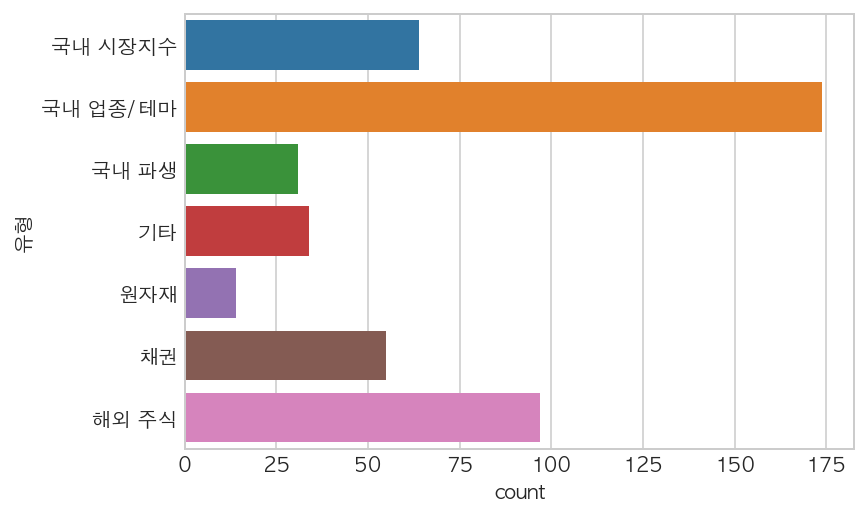

In [20]:
# sns.countplot 으로 빈도수를 시각화 합니다.
# sns.countplot(data=df, y="유형", order=df["유형"].value_counts().index)
sns.countplot(data=df.sort_values("유형"), y="유형")

In [21]:
# value_counts 로 빈도수를 직접 계산합니다.
df["유형"].value_counts()

국내 업종/테마    174
해외 주식        97
국내 시장지수      64
채권           55
기타           34
국내 파생        31
원자재          14
Name: 유형, dtype: int64

In [22]:
# value_counts(normalize=True) 로 빈도수의 비율을 구합니다.
df["유형"].value_counts(normalize=True) * 100

국내 업종/테마    37.100213
해외 주식       20.682303
국내 시장지수     13.646055
채권          11.727079
기타           7.249467
국내 파생        6.609808
원자재          2.985075
Name: 유형, dtype: float64

### 두 개의 변수 빈도수와 비율

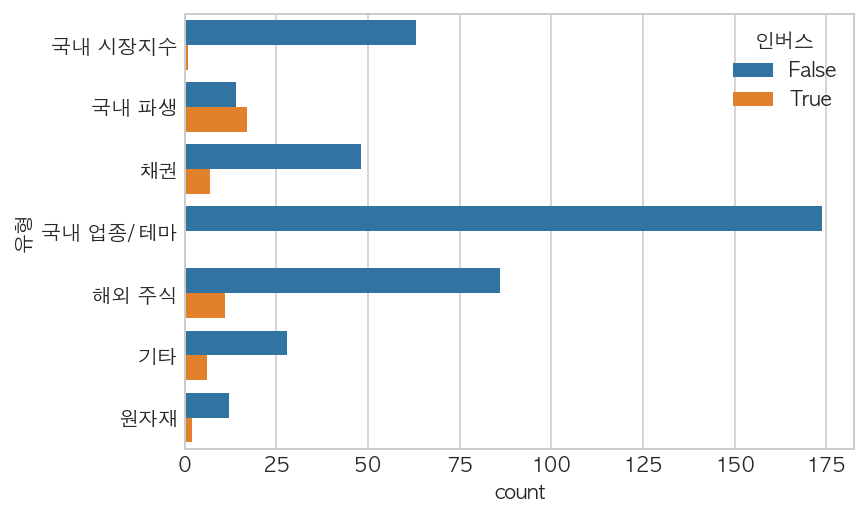

In [23]:
# 유형 컬럼의 빈도수를 봅니다.
# seaborn countplot의 hue를 이용하여 인버스여부에 따라 다른 색상으로 표시해 봅니다.
sns.countplot(data=df, y="유형", hue="인버스")

In [24]:
# pandas crosstab을 이용하여 위 그래프의 수치를 확인 할 수 있습니다.
# seaborn 은 아래와 같은 연산을 하지 않더라도 알아서 통계적 연산을 시각화 해줍니다.
pd.crosstab(df["인버스"], df["유형"])

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
인버스,,,,,,,
False,63,174,14,28,12,48,86
True,1,0,17,6,2,7,11


In [25]:
# value_counts 처럼 normalize 를 사용해 비율을 구할 수도 있습니다.
n = pd.crosstab(df["인버스"], df["유형"], normalize=True) * 100
n

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
인버스,,,,,,,
False,13.432836,37.100213,2.985075,5.970149,2.558635,10.234542,18.336887
True,0.213220,0.000000,3.624733,1.279318,0.426439,1.492537,2.345416


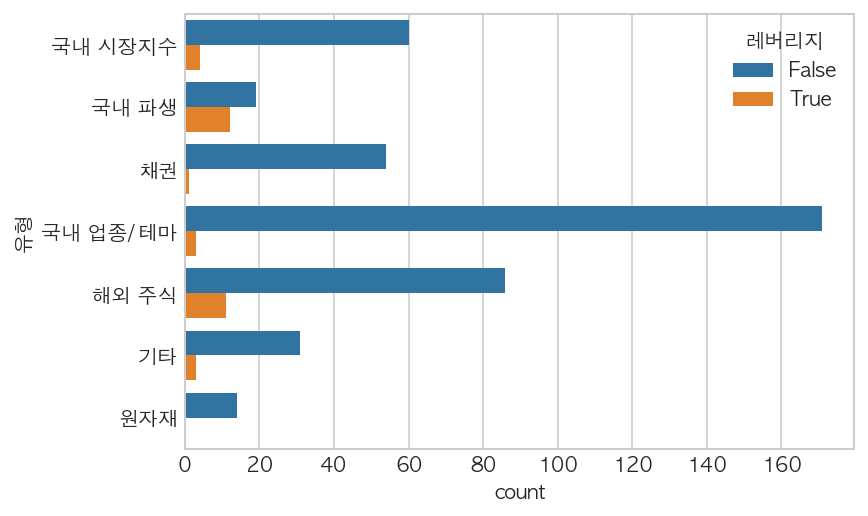

In [26]:
# 동일하게 유형 데이터를 레버리지 여부에 따라 그립니다.
sns.countplot(data=df, y="유형", hue="레버리지")

In [27]:
# 레버리지, 유형에 대한 빈도수를 구힙니다.
pd.crosstab(df["레버리지"], df["유형"])

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
레버리지,,,,,,,
False,60,171,19,31,14,54,86
True,4,3,12,3,0,1,11


In [28]:
# 레버리지, 유형에 대한 빈도수의 비율을 구합니다.

pd.crosstab(df["레버리지"], df["유형"], normalize=True) * 100

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
레버리지,,,,,,,
False,12.793177,36.460554,4.051173,6.609808,2.985075,11.513859,18.336887
True,0.852878,0.639659,2.558635,0.639659,0.000000,0.213220,2.345416


### 브랜드별 빈도수

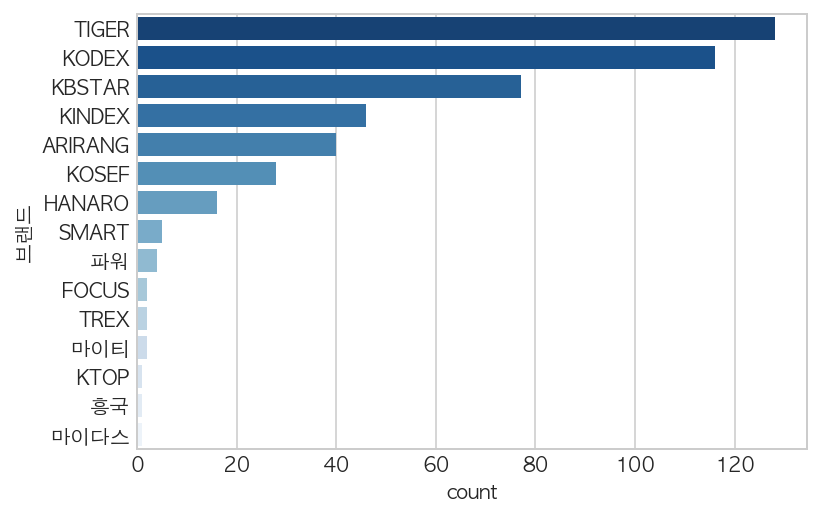

In [29]:
# 브랜드별 ETF 빈도수
sns.countplot(data=df, y="브랜드", 
              order=df["브랜드"].value_counts().index, 
              palette="Blues_r")

### 인버스, 브랜드의 ETF 빈도 비율


* 인버스 ETF란? 주식관련 장내 외 파생상품 투자 및 증권차입매도 등을 통해 기초지수(KOSPI 200지수)의 일일 변동률(일별수익률)을 음의 1배수 즉, 역방향으로 추적하는 ETF를 말한다. 예를 들어, KOSPI 200지수가 1% 상승할 경우 인버스 ETF는 마이너스 1% 수익률, 반대로 KOSPI 200 지수가 1% 하락시 인버스 ETF는 플러스 1%의 수익률을 목표로 운영된다.
[네이버 지식백과] 인버스ETF (매일경제, 매경닷컴)
* 출처 : https://terms.naver.com/entry.nhn?docId=20336&cid=43659&categoryId=43659

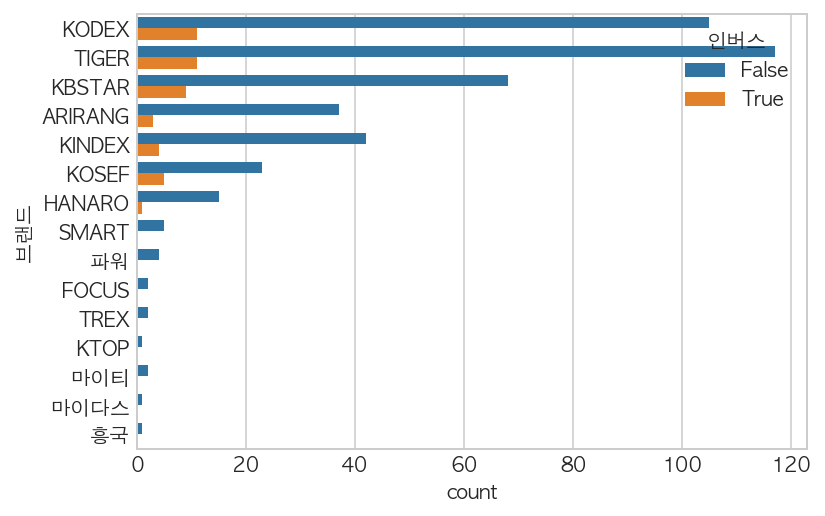

In [31]:
# 브랜드 column의 빈도수를 인버스에 따른 구분으로 그려봅니다.
sns.countplot(data=df, y="브랜드", hue="인버스")

In [32]:
# 인버스, 브랜드의 금융상품 빈도수
pd.crosstab(df["인버스"], df["브랜드"])

브랜드,ARIRANG,FOCUS,HANARO,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,SMART,TIGER,TREX,마이다스,마이티,파워,흥국
인버스,,,,,,,,,,,,,,,
False,37,2,15,68,42,105,23,1,5,117,2,1,2,4,1
True,3,0,1,9,4,11,5,0,0,11,0,0,0,0,0


In [33]:
# 인버스, 브랜드의 금융상품 빈도 비율
in_brand_norm = pd.crosstab(df["인버스"], df["브랜드"], normalize=True) * 100
in_brand_norm.round(2)

브랜드,ARIRANG,FOCUS,HANARO,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,SMART,TIGER,TREX,마이다스,마이티,파워,흥국
인버스,,,,,,,,,,,,,,,
False,7.89,0.43,3.20,14.50,8.96,22.39,4.90,0.21,1.07,24.95,0.43,0.21,0.43,0.85,0.21
True,0.64,0.00,0.21,1.92,0.85,2.35,1.07,0.00,0.00,2.35,0.00,0.00,0.00,0.00,0.00


### 레버리지, 브랜드의 ETF 빈도 비율
* 레버리지 ETF란? 일반 ETF가 코스피200과 같은 지수 내 대표 주식을 보유함으로써 지수와 비슷한 수익률을 내는 것을 목표로 하는 데 비해 레버리지ETF는 선물 등 파생상품에 투자해 지수보다 높은 수익을 추구하는 ETF다. 상승장에서는 높은 수익률을 기대할 수 있지만 하락장에서는 손실도 커져 고위험ㆍ고수익 상품으로 분류된다.
[네이버 지식백과] 레버리지 ETF (매일경제, 매경닷컴)
* 출처 : https://terms.naver.com/entry.nhn?docId=2059802&cid=43659&categoryId=43659

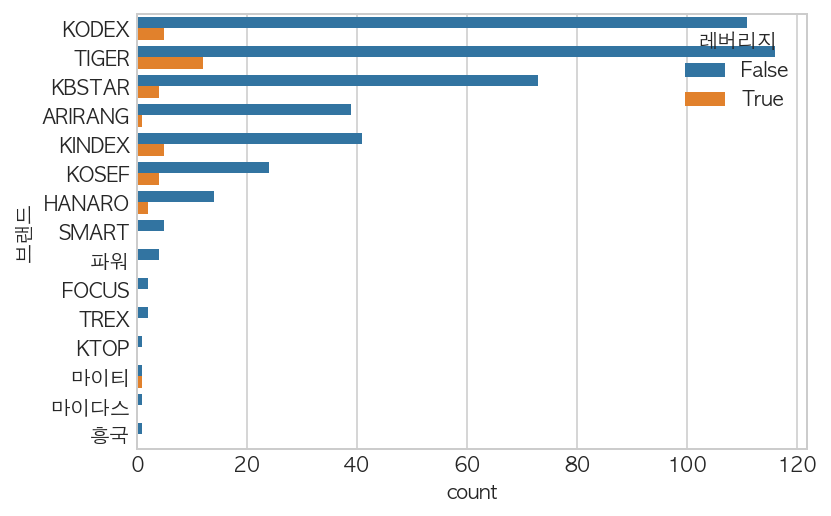

In [34]:
# 브랜드별 레버리지 여부에 따른 빈도수를 시각화 합니다.
sns.countplot(data=df, y="브랜드", hue="레버리지")

In [35]:
# 레버리지, 브랜드의 ETF 빈도수(crosstab)
pd.crosstab(df["레버리지"], df["브랜드"])

브랜드,ARIRANG,FOCUS,HANARO,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,SMART,TIGER,TREX,마이다스,마이티,파워,흥국
레버리지,,,,,,,,,,,,,,,
False,39,2,14,73,41,111,24,1,5,116,2,1,1,4,1
True,1,0,2,4,5,5,4,0,0,12,0,0,1,0,0


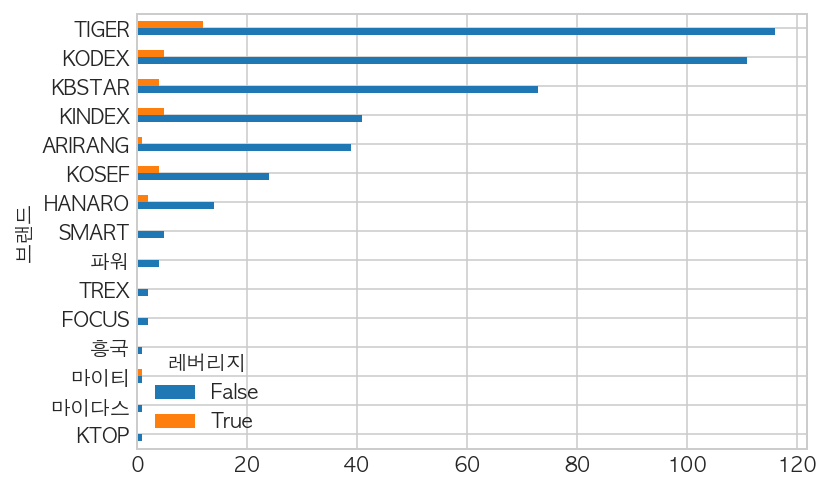

In [36]:
# 레버리지, 브랜드의 ETF 빈도수(crosstab)
pd.crosstab(df["레버리지"], df["브랜드"]).T.sort_values(by=False).plot.barh()

In [37]:
# 레버리지, 브랜드의 ETF 비율

pd.crosstab(df["레버리지"], df["브랜드"], normalize=True) * 100

브랜드,ARIRANG,FOCUS,HANARO,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,SMART,TIGER,TREX,마이다스,마이티,파워,흥국
레버리지,,,,,,,,,,,,,,,
False,8.315565,0.426439,2.985075,15.565032,8.742004,23.667377,5.117271,0.21322,1.066098,24.733475,0.426439,0.21322,0.21322,0.852878,0.21322
True,0.213220,0.000000,0.426439,0.852878,1.066098,1.066098,0.852878,0.00000,0.000000,2.558635,0.000000,0.00000,0.21322,0.000000,0.00000


## 수치형 변수의 기술통계

In [38]:
# describe로 수치형 변수의 기술통계 구하기
desc = df.describe()
desc

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억)
count,469.000000,469.000000,469.000000,469.000000,469.000000,341.000000,448.000000,4.690000e+02,4.690000e+02,469.000000
mean,3.264392,23403.315565,2.735608,123.187633,0.626311,26340.123167,18.903669,1.504756e+06,9.914160e+03,1157.334755
std,1.842759,25489.438007,1.256790,253.512544,1.207118,28099.424237,22.062216,1.921380e+07,7.618593e+04,3873.389381
min,1.000000,2085.000000,2.000000,-315.000000,-2.770000,2076.000000,-48.962200,0.000000e+00,0.000000e+00,18.000000
25%,2.000000,10665.000000,2.000000,0.000000,0.000000,10932.000000,4.243625,7.010000e+02,1.200000e+01,80.000000
50%,2.000000,13970.000000,2.000000,70.000000,0.520000,15072.000000,17.037500,6.601000e+03,9.800000e+01,153.000000
75%,4.000000,21480.000000,3.000000,180.000000,1.010000,27870.000000,33.907225,5.075800e+04,7.620000e+02,527.000000
max,7.000000,134795.000000,5.000000,3670.000000,5.520000,134835.000000,130.181400,3.928837e+08,1.209174e+06,54998.000000


## 수치형 변수로 히스토그램 그리기

* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

In [39]:
# 수치형 컬럼만 리스트로 만들기
num_cols = desc.columns.tolist()
num_cols

['탭코드',
 '현재가',
 '등락구분',
 '전일비',
 '등락률',
 '순자산가치(NAV)',
 '3개월수익률',
 '거래량',
 '거래대금(백만)',
 '시가총액(억)']

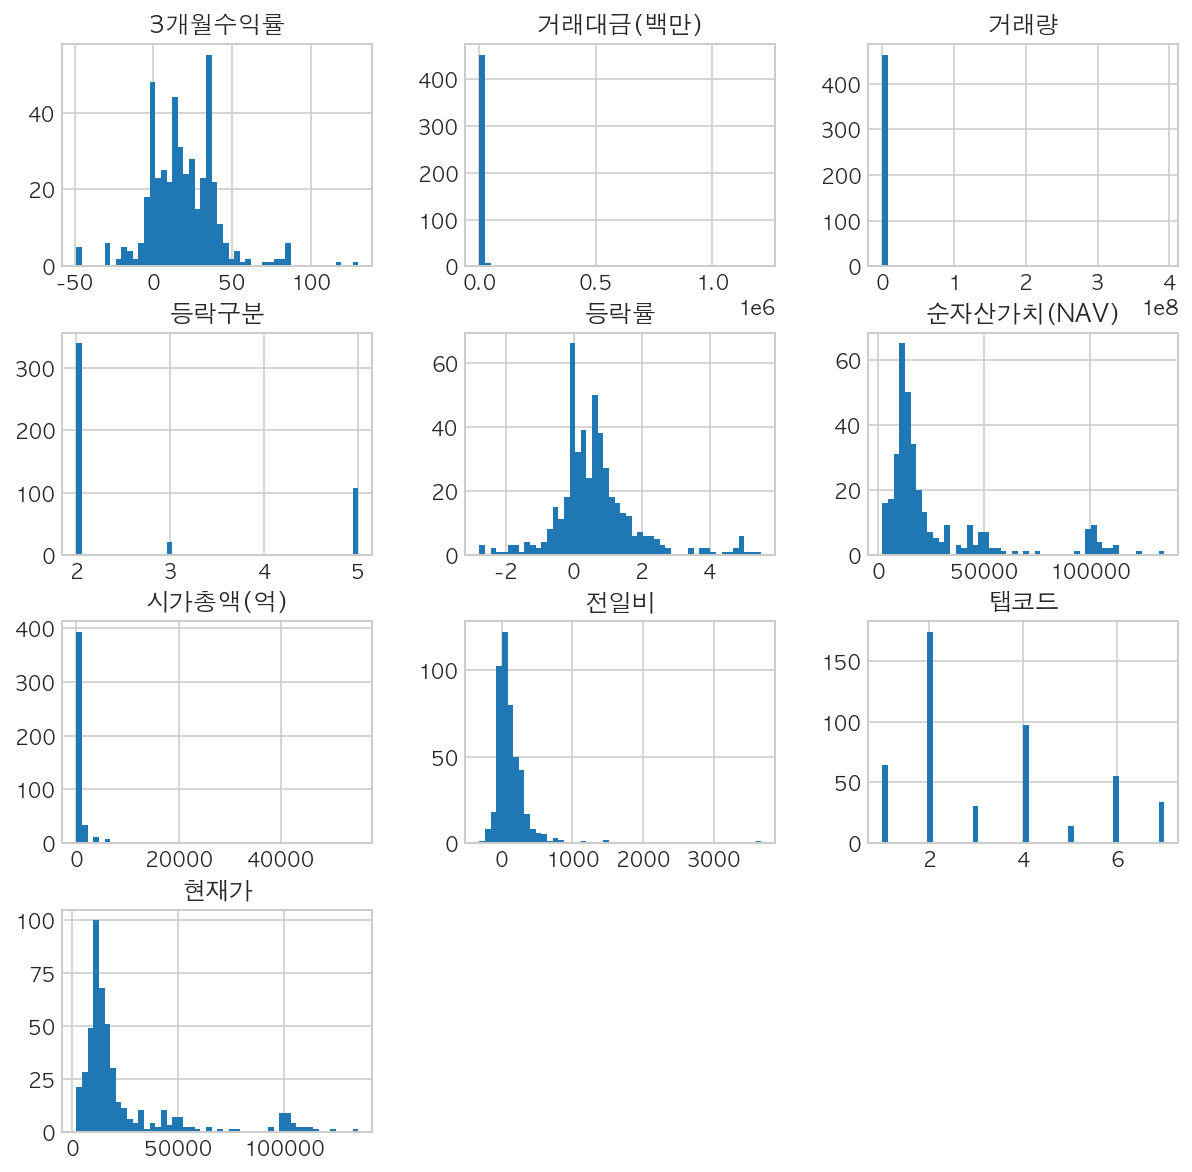

In [40]:
# 히스토그램을 그려보면 수치 데이터로 되어있지만 범주형 데이터를 찾아볼 수 있습니다.
h = df[num_cols].hist(figsize=(10, 10), bins=50)

## 범주형 vs 수치형 변수
### seaborn의 barplot 이해하기

Text(0.5, 1.0, '브랜드별 평균 3개월 수익률')

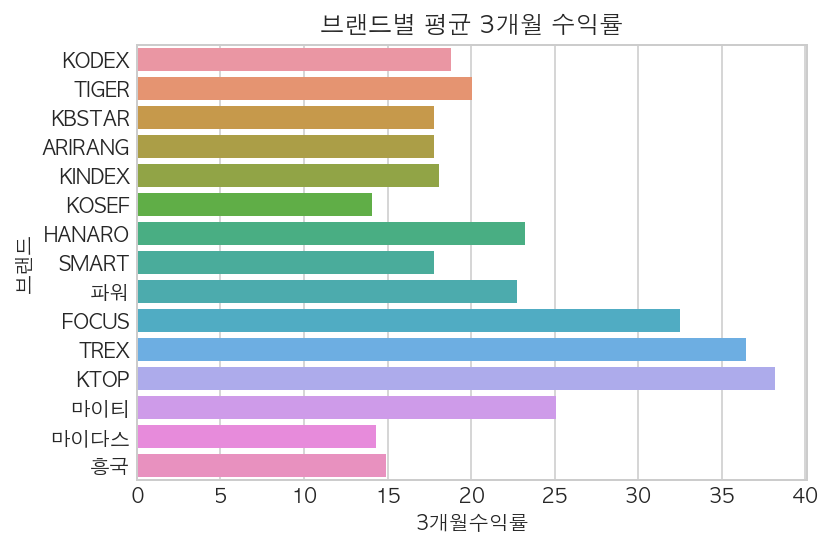

In [41]:
# seaborn의 bar chart를 이용하여 각 브랜드에 대한 3개월수익률의 평균값을 볼 수 있습니다.
# 검은색 막대는 ci로 신뢰구간을 의미합니다.
sns.barplot(data=df, 
            y="브랜드", 
            x="3개월수익률", 
            orient="h", ci=None).set_title("브랜드별 평균 3개월 수익률")

### barplot 그래프의 값을 groupby 로 직접 구하기

In [42]:
# 위 그래프의 평균 값을 직접 계산을 통해 구해 봅니다.
brand_3month_mean = df.groupby(["브랜드"])["3개월수익률"].mean()
brand_3month_mean

브랜드
ARIRANG    17.799346
FOCUS      32.509750
HANARO     23.247400
KBSTAR     17.781746
KINDEX     18.071638
KODEX      18.791169
KOSEF      14.067685
KTOP       38.160500
SMART      17.759760
TIGER      20.074260
TREX       36.427700
마이다스       14.324500
마이티        25.081250
파워         22.758075
흥국         14.901700
Name: 3개월수익률, dtype: float64

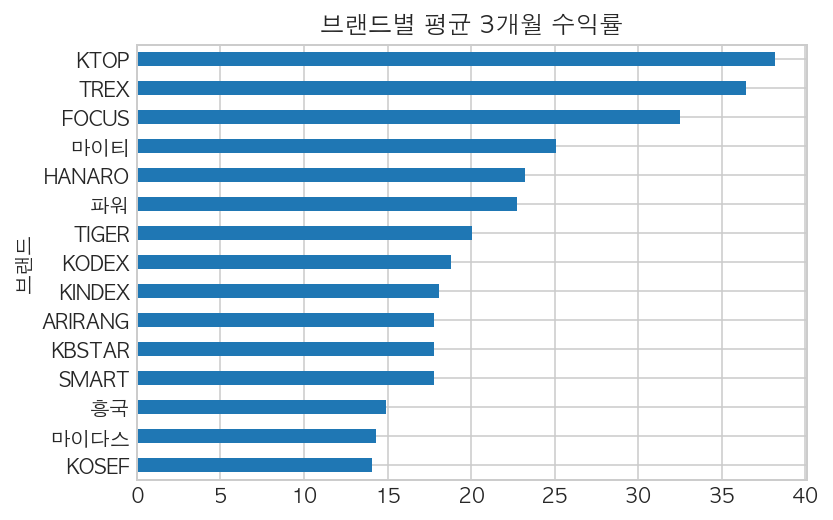

In [43]:
# 위에서 구한 그룹(브랜드)별 평균 3개월 수익률을 그래프로 표현합니다.
brand_3month_mean.sort_values().plot.barh(title="브랜드별 평균 3개월 수익률")

* [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

### boxplot으로 그리기

#### 기술통계 용어

* 백분위 수 : 데이터를 백등분 한 것
* 사분위 수 : 데이터를 4등분 한 것
* 중위수 : 데이터의 정 가운데 순위에 해당하는 값.(관측치의 절반은 크거나 같고 나머지 절반은 작거나 같다.)
* 제 3사분위 수 (Q3) : 중앙값 기준으로 상위 50% 중의 중앙값, 전체 데이터 중 상위 25%에 해당하는 값
* 제 1사분위 수 (Q1) : 중앙값 기준으로 하위 50% 중의 중앙값, 전체 데이터 중 하위 25%에 해당하는 값
* 사분위 범위 수(IQR) : 데이터의 중간 50% (Q3 - Q1)

* 출처 : [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)

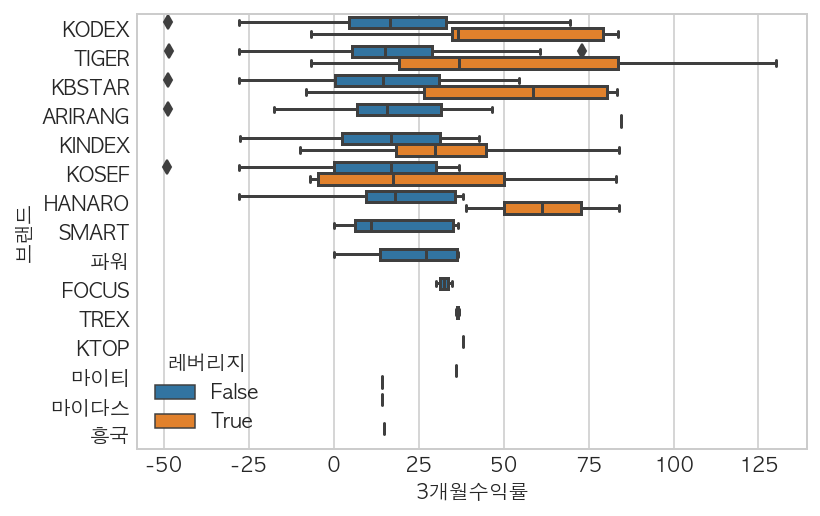

In [47]:
# 브랜드별 3개월 수익률을 레버리지에 따라 다른 색상으로 시각화 합니다.
sns.boxplot(data=df, x="3개월수익률", y="브랜드", hue="레버리지")

#### boxplot 보는 방법

* 사분위수 범위(IQR, Interquartile range, Q3-Q1)
* 이상치를 제외한 최댓값  = Q3 + 1.5IQR
* 이상치를 제외한 최솟값  = Q1 - 1.5IQR

### 3개월 수익률에 대한 기술통계 값 구하기

In [48]:
# 위에서 그린 boxplot의 값을 직접 구해봅니다.
brand_3month_desc = df.groupby(["브랜드", "레버리지"])["3개월수익률"].describe()
brand_3month_desc

count       mean        std      min        25%       50%  \
브랜드     레버리지                                                               
ARIRANG False   38.0  16.040126  18.279443 -48.6619   6.788950  15.77770   
        True     1.0  84.649700        NaN  84.6497  84.649700  84.64970   
FOCUS   False    2.0  32.509750   3.220518  30.2325  31.371125  32.50975   
HANARO  False   12.0  16.886875  19.862345 -27.8024   9.394325  17.99070   
        True     2.0  61.410550  31.991561  38.7891  50.099825  61.41055   
KBSTAR  False   67.0  15.962894  19.973994 -48.8485   0.352950  14.38550   
        True     4.0  48.247525  42.738926  -8.0700  26.665725  58.77145   
KINDEX  False   38.0  16.460968  16.749684 -27.5758   2.424975  16.80515   
        True     4.0  33.373000  38.569665 -10.0491  18.362700  29.86255   
KODEX   False  108.0  17.552085  18.521050 -48.6651   4.446300  16.58895   
        True     5.0  45.555380  37.097133  -6.6033  34.747100  36.69880   
KOSEF   False   23.0  11.672648  22.546850 -48.9622   0.046150  16.90910   
        True     4.0  27.839150  42.450891  -6.8585  -4.688075  17.49685   
KTOP    False    1.0  38.160500        NaN  38.1605  38.160500  38.16050   
SMART   False    5.0  17.759760  16.892145   0.1099   6.262200  10.87750   
TIGER   False  112.0  16.898527  18.450739 -48.4137   5.321100  15.13665   
        True    12.0  49.714433  44.996482  -6.7434  19.334150  36.80025   
TREX    False    2.0  36.427700   0.639083  35.9758  36.201750  36.42770   
마이다스    False    1.0  14.324500        NaN  14.3245  14.324500  14.32450   
마이티     False    1.0  35.859600        NaN  35.8596  35.859600  35.85960   
        True     1.0  14.302900        NaN  14.3029  14.302900  14.30290   
파워      False    4.0  22.758075  17.493274   0.0009  13.522200  27.18240   
흥국      False    1.0  14.901700        NaN  14.9017  14.901700  14.90170   

                     75%       max  
브랜드     레버리지                        
ARIRANG False  31.593975   46.6594  
        True   84.649700   84.6497  
FOCUS   False  33.648375   34.7870  
HANARO  False  35.811550   38.0857  
        True   72.721275   84.0320  
KBSTAR  False  31.132200   54.5000  
        True   80.353250   83.5172  
KINDEX  False  31.227275   42.7044  
        True   44.872850   83.8160  
KODEX   False  32.983625   69.5137  
        True   79.265700   83.6686  
KOSEF   False  30.051150   36.7838  
        True   50.024075   83.2214  
KTOP    False  38.160500   38.1605  
SMART   False  34.989600   36.5596  
TIGER   False  28.824025   72.9716  
        True   83.804075  130.1814  
TREX    False  36.653650   36.8796  
마이다스    False  14.324500   14.3245  
마이티     False  35.859600   35.8596  
        True   14.302900   14.3029  
파워      False  36.418275   36.6666  
흥국      False  14.901700   14.9017

<img src="https://miro.medium.com/max/1400/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="400">

* 이미지 출처 : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

### KODEX ETF 따로 분석하기

* ⚠️ 주의사항 ⚠️  분석내용은 데이터 수집 시점에 따라 달라집니다.

In [49]:
# KODEX 서브셋을 만듭니다.
kodex = df[df["브랜드"] == "KODEX"]

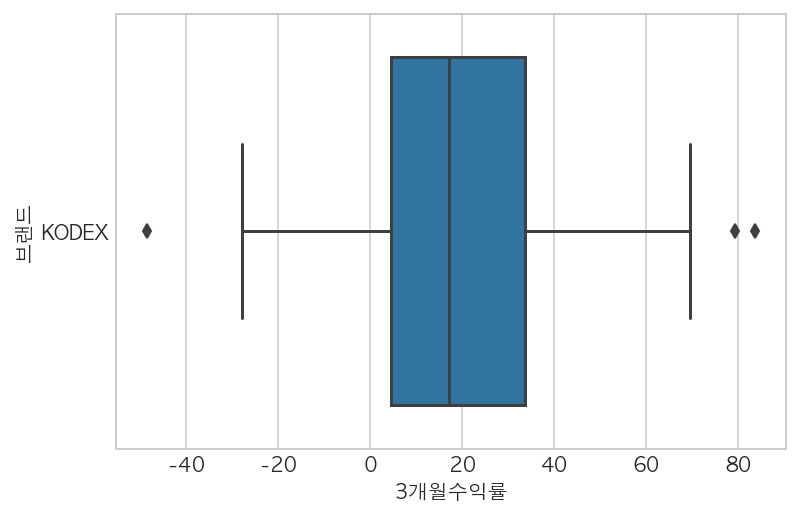

In [51]:
# KODEX 의 boxplot을 그립니다.
sns.boxplot(data=kodex, x="3개월수익률", y="브랜드")

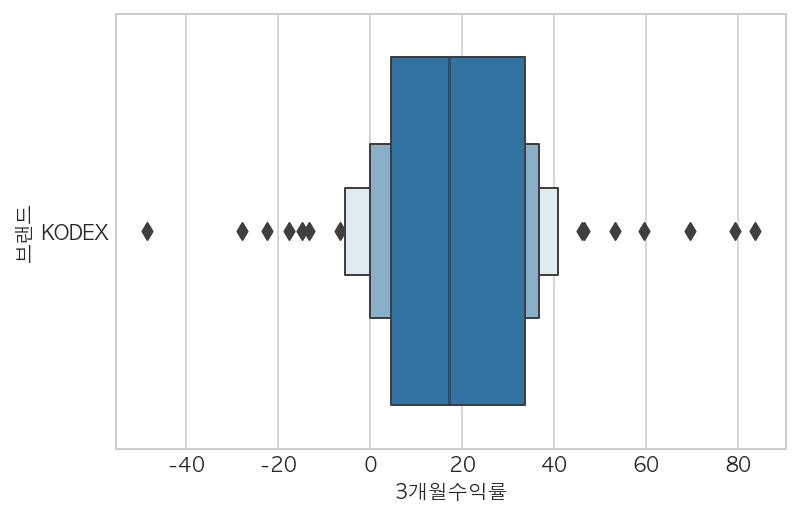

In [52]:
# KODEX 의 boxenplot을 그립니다.
sns.boxenplot(data=kodex, x="3개월수익률", y="브랜드")

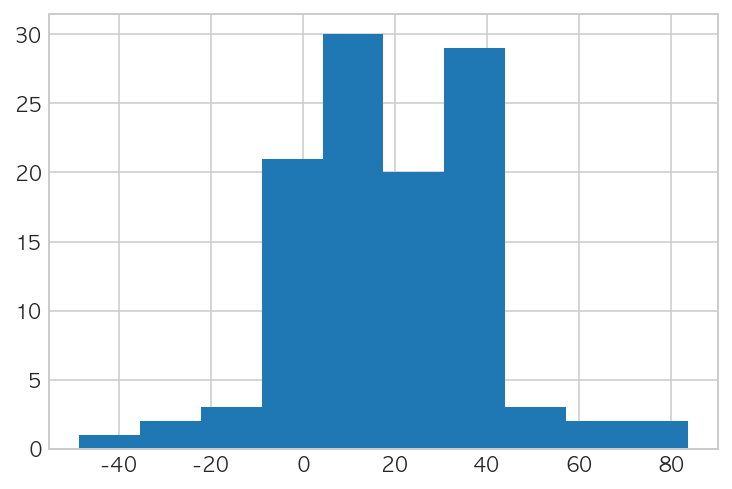

In [53]:
# KODEX 의 historam 을 pandas로 그립니다.
kodex["3개월수익률"].hist(bins=10)

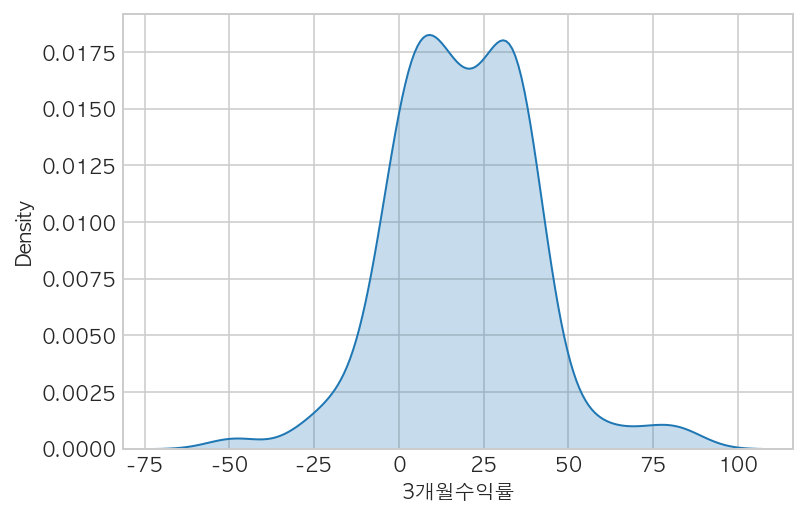

In [54]:
# KODEX 의 kdeplot 을 그립니다.
sns.kdeplot(data=kodex, x="3개월수익률", shade=True)

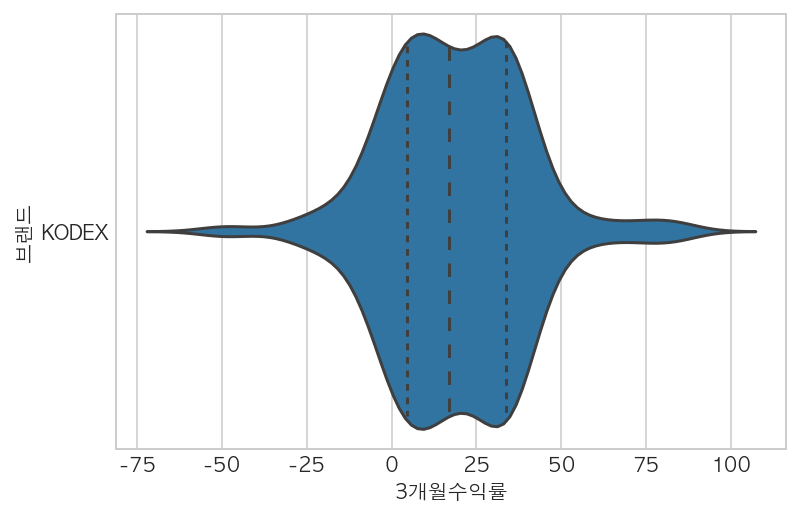

In [55]:
# KODEX 의 violinplot 을 그립니다.
sns.violinplot(data=kodex, x="3개월수익률", y="브랜드", 
               cut=3, inner='quartile')

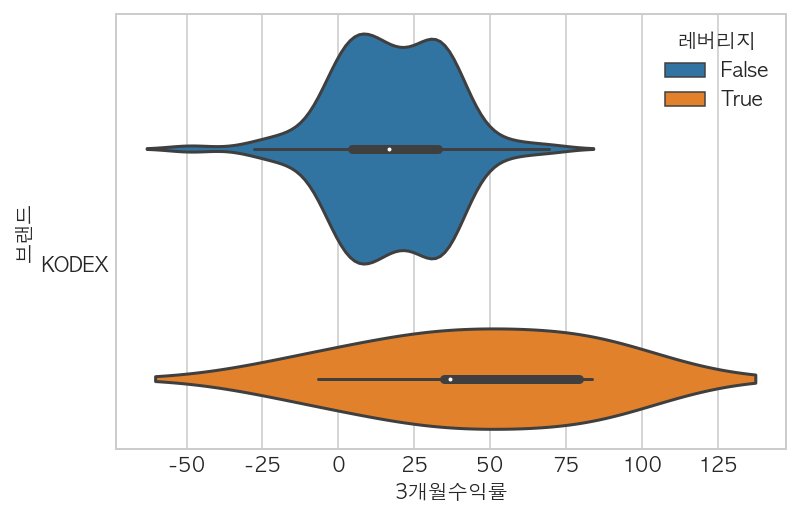

In [56]:
# KODEX 의 violinplot 에 hue="레버리지"로 그립니다.

sns.violinplot(data=kodex, x="3개월수익률", y="브랜드", hue="레버리지")

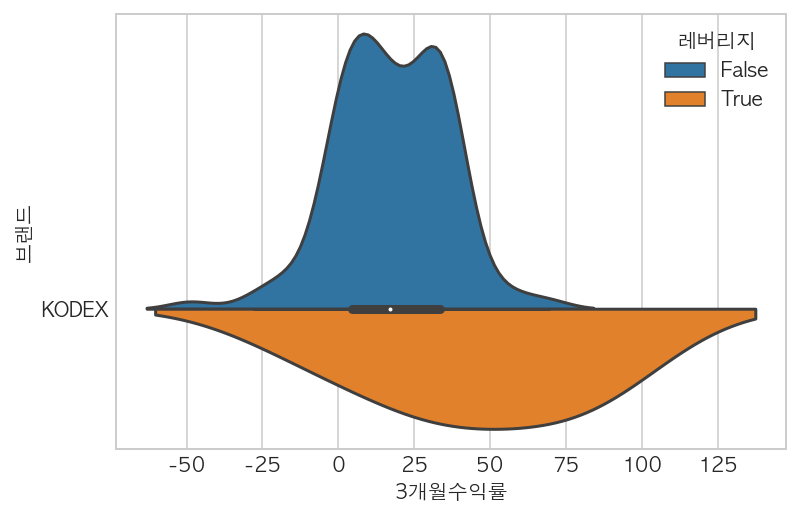

In [57]:
# KODEX 의 violinplot 에 hue="레버리지"를 split 옵션을 사용해 그립니다.

sns.violinplot(data=kodex, x="3개월수익률", y="브랜드", 
               hue="레버리지",  split=True)

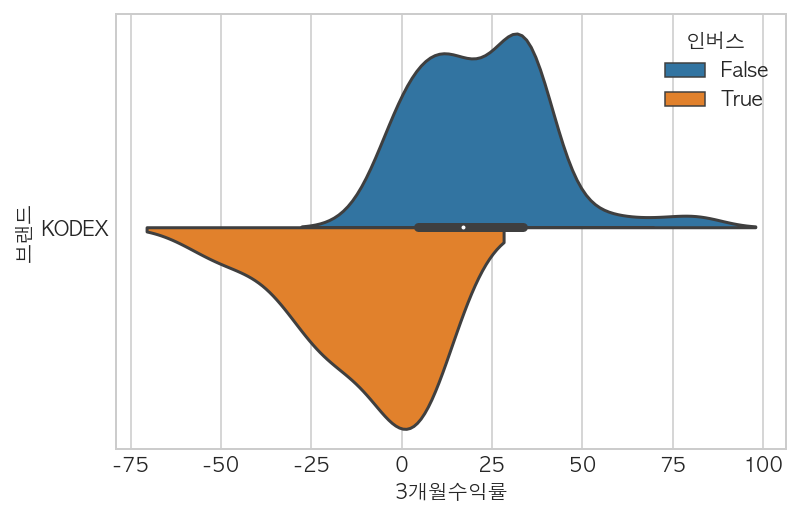

In [58]:
# KODEX 의 violinplot 에 hue="인버스"로 그립니다.

sns.violinplot(data=kodex, x="3개월수익률", y="브랜드", 
               hue="인버스",  split=True)

* 이미지 출처 : [The Datasaurus Dozen - Same Stats, Different Graphs | Autodesk Research](https://www.autodeskresearch.com/publications/samestats)

<img src="https://d2f99xq7vri1nk.cloudfront.net/BoxViolinSmaller.gif">

### 브랜드별 3개월수익률

### 서브플롯 그려보기

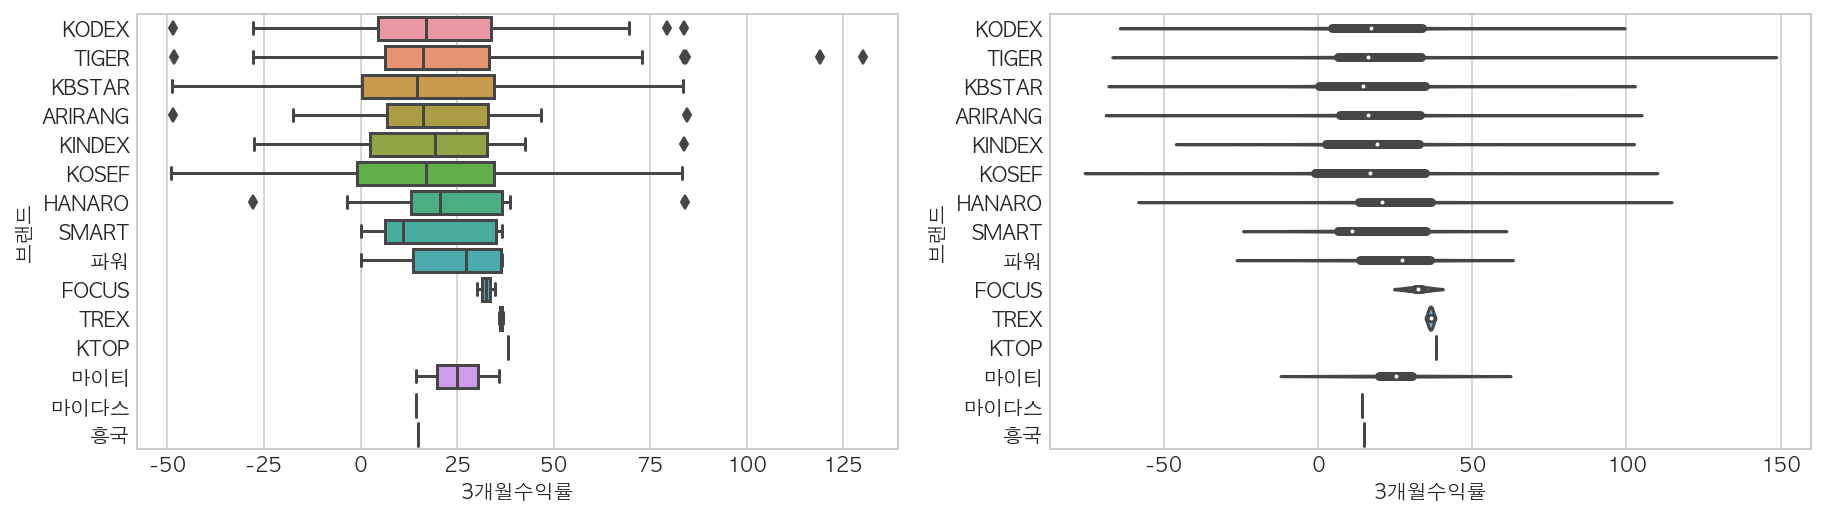

In [61]:
# boxplot과 violinplot을 하나의 그래프에 같이 그려봅니다.
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
sns.boxplot(data=df, x="3개월수익률", y="브랜드", ax=axes[0])
sns.violinplot(data=df, x="3개월수익률", y="브랜드", ax=axes[1])

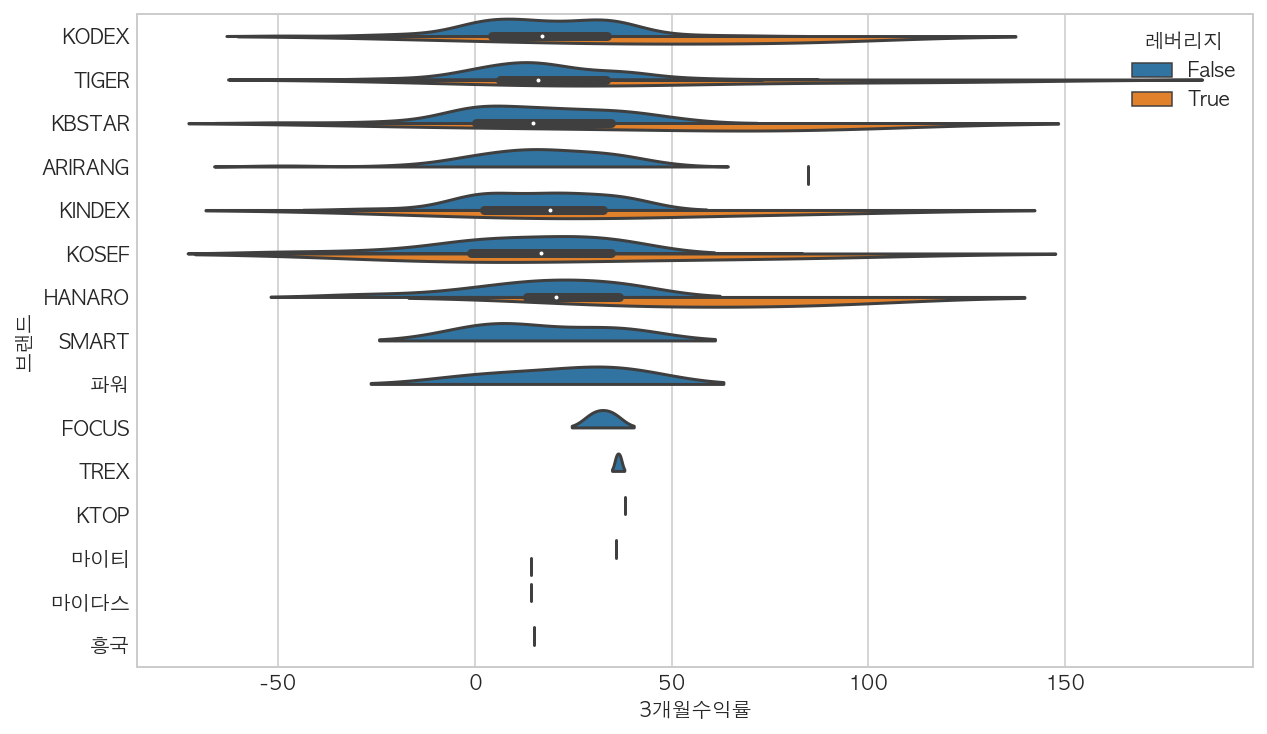

In [62]:
# violinplot은 kdeplot을 마주보도록 그린 그래프로 값의 분포를 알 수 있습니다.
# boxplot의 단점을 보완하기 위해 만들어지기도 했는데 내부에 boxplot을 함께 그려줍니다.
# 가운데 점은 중앙값을 의미합니다.
# 브랜드별 3개월수익률을 레버리지 여부에 따라 그려봅니다.
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="3개월수익률", y="브랜드", hue="레버리지", split=True)

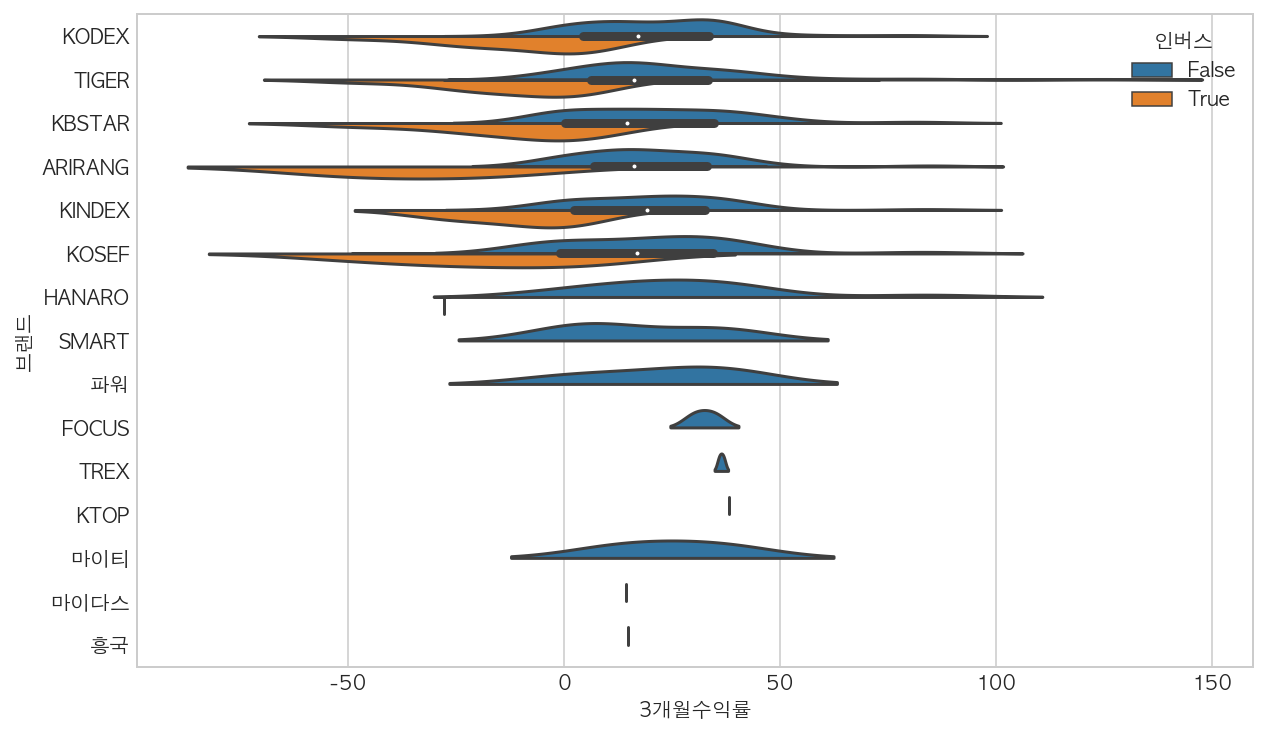

In [63]:
# 브랜드별 3개월수익률을 인버스 여부에 따라 그려봅니다.
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="3개월수익률", y="브랜드", hue="인버스", split=True)

### 브랜드별 거래량

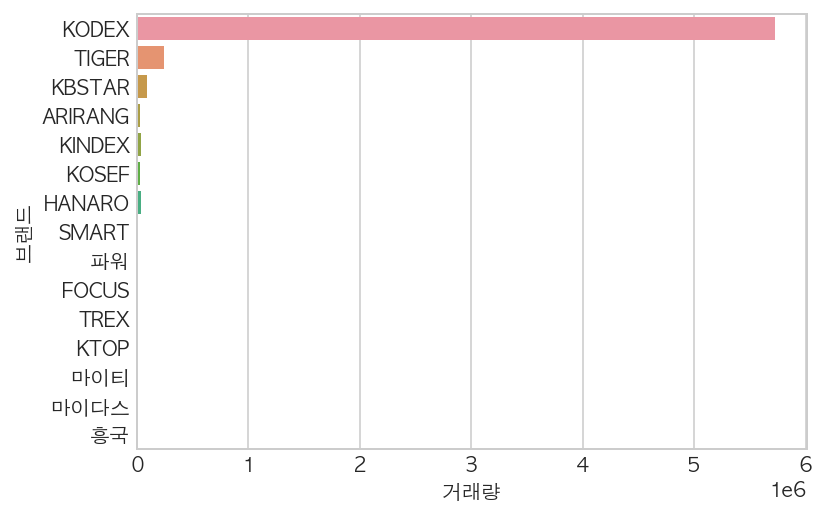

In [64]:
# 수집한 날짜에 대한 브랜드별 거래량을 봅니다.
sns.barplot(data=df, x="거래량", y="브랜드", ci=None)

In [65]:
# df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])]

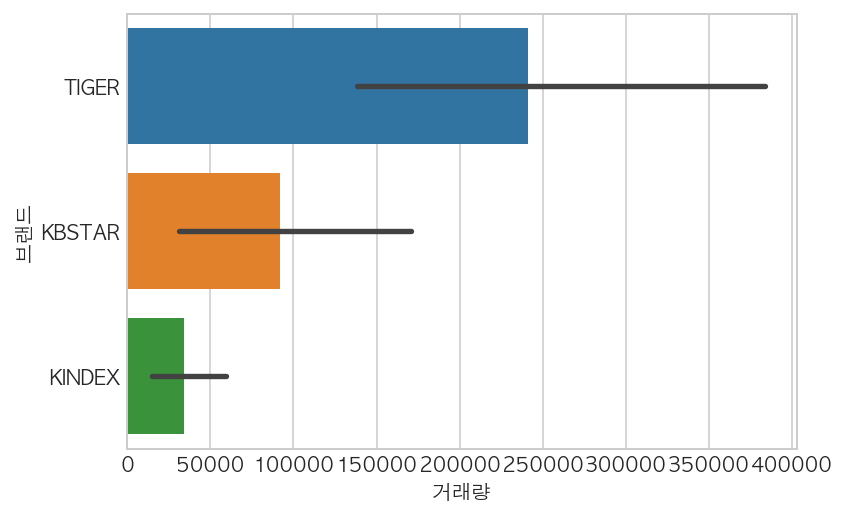

In [66]:
# 전체 브랜드를 보면 값의 크기 차이로 시각화를 제대로 보기 어렵습니다.
# 일부 브랜드 "TIGER", "KBSTAR", "KINDEX" 를 따로 가져와서 시각화 합니다.
sns.barplot(data=df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])], 
            y="브랜드", x="거래량")

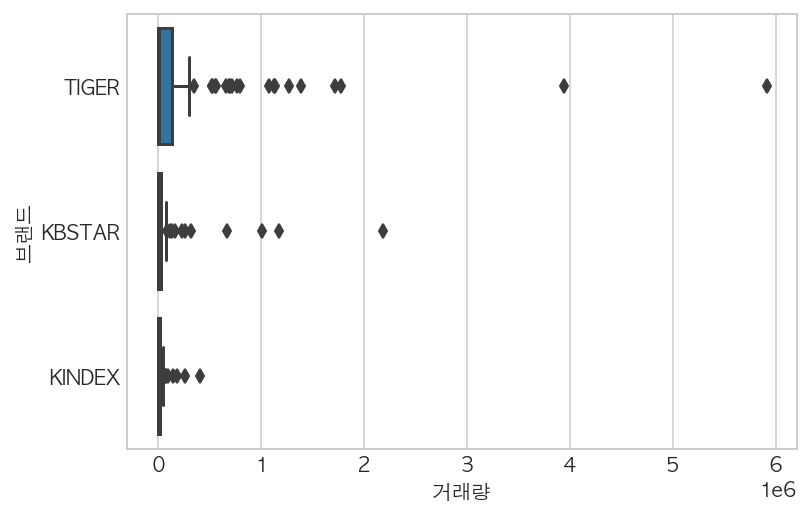

In [67]:
sns.boxplot(data=df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])], 
            y="브랜드", x="거래량")

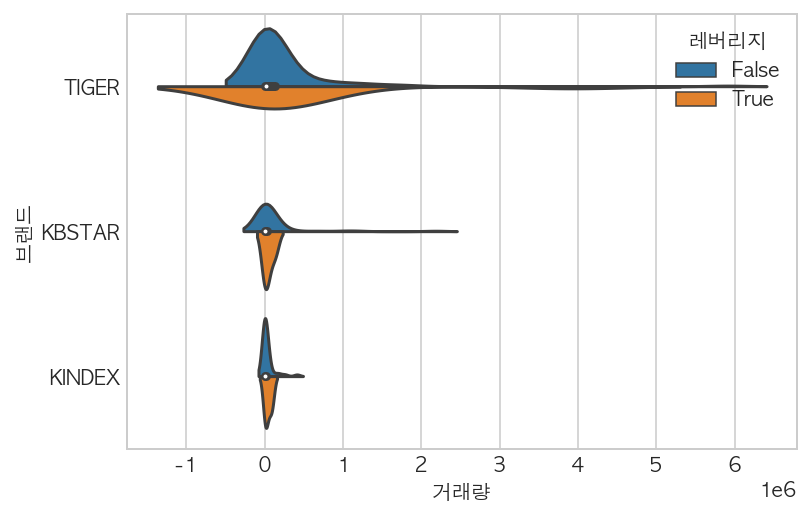

In [68]:
sns.violinplot(data=df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])], 
            y="브랜드", x="거래량", hue="레버리지", split=True)

### 유형에 따른 거래량

Text(0.5, 1.0, 'ETF 유형별 평균 거래량')

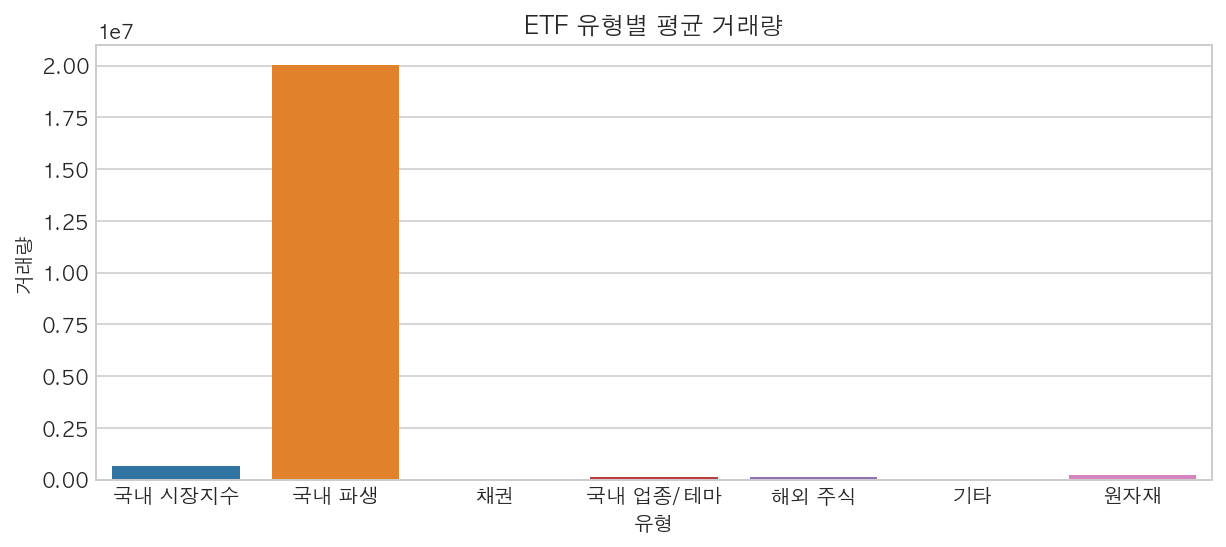

In [71]:
# 유형에 따른 평균 거래량을 barplot으로 시각화 합니다.
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="유형", y="거래량", 
            ci=None).set_title("ETF 유형별 평균 거래량")

### 유형에 따른 거래대금

Text(0.5, 1.0, 'ETF유형별 평균 거래대금(백만)')

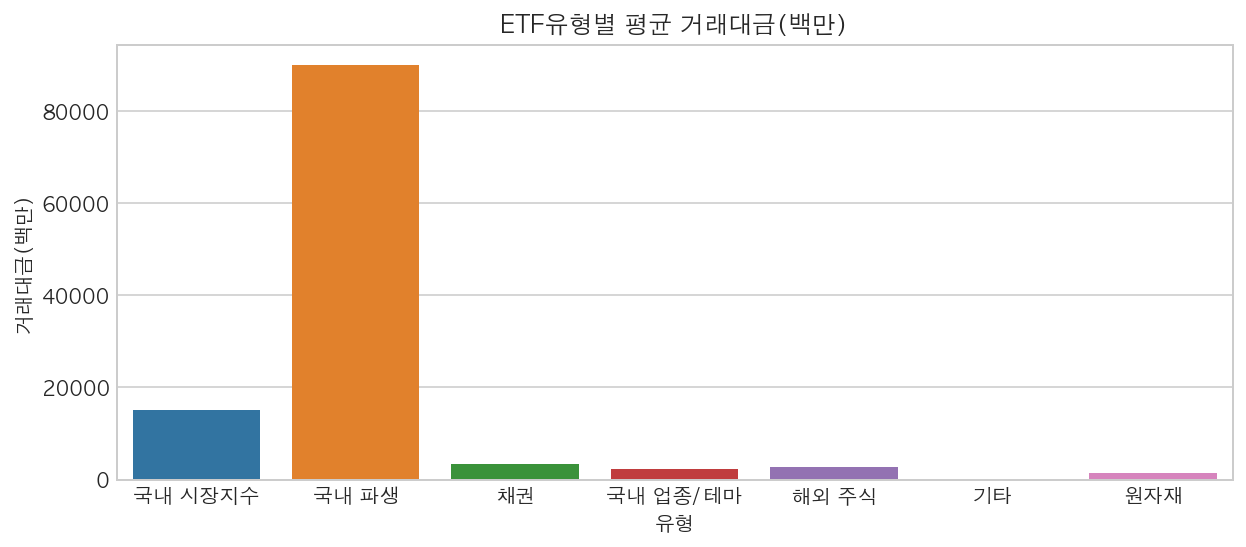

In [73]:
# 위 그래프의 유형에 따른 평균 거래대금(백만)을 barplot 으로 그립니다.
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="유형", y="거래대금(백만)", 
            ci=None).set_title("ETF유형별 평균 거래대금(백만)")

### 유형에 따른 시가총액

Text(0.5, 1.0, 'ETF유형별 평균 시가총액(억)')

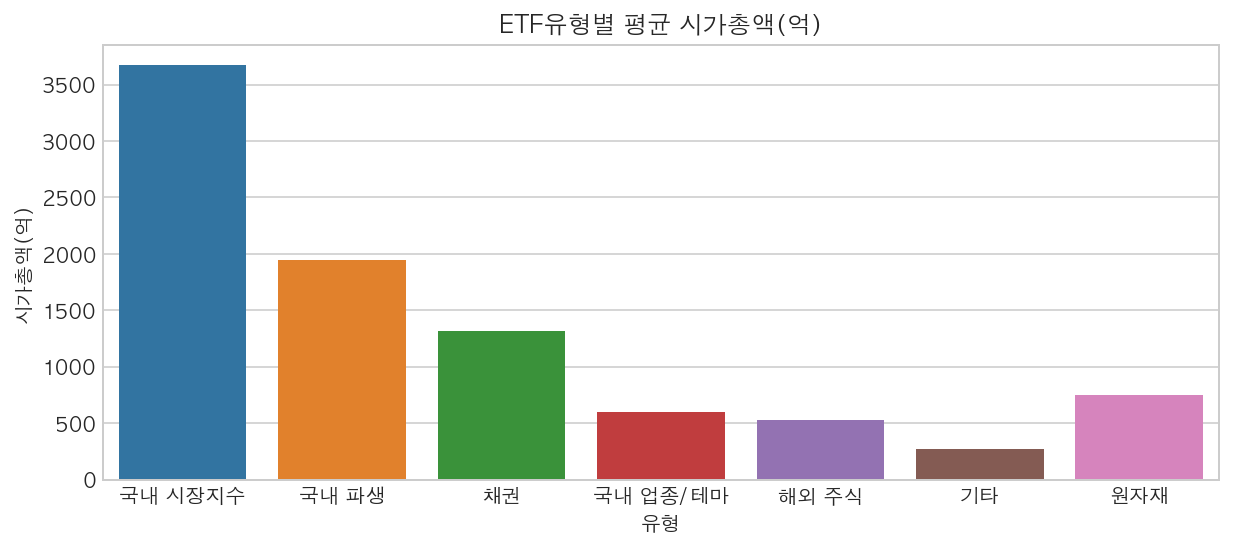

In [76]:
# 유형에 따른 평균 시가총액(억) 에 대한 시각화를 합니다.
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="유형", y="시가총액(억)", 
            ci=None).set_title("ETF유형별 평균 시가총액(억)")

### 유형에 따른 3개월 수익률

Text(0.5, 1.0, 'ETF유형별 3개월수익률')

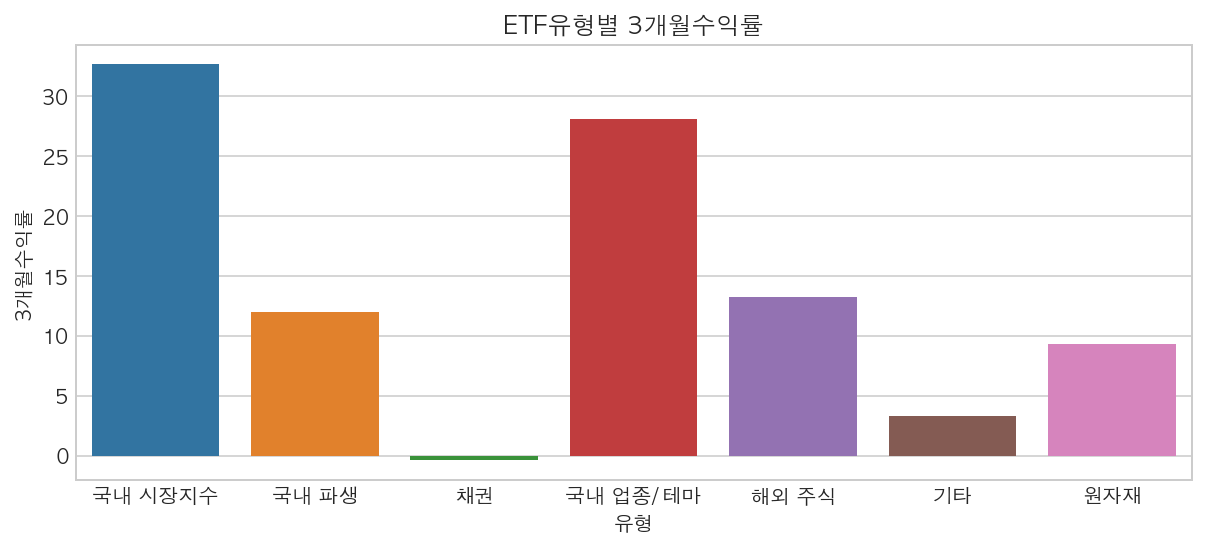

In [79]:
# 유형에 따른 평균 3개월수익률에 대한 시각화를 합니다.
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="유형", y="3개월수익률", 
            ci=None).set_title("ETF유형별 3개월수익률")

## 여러 개의 변수로 서브플롯 그리기
### PairGrid와 barplot 으로 서브플롯 그리기


* PairGrid는 한번에 서브플롯을 쉽게 그려볼 수 있는 장점이 있지만 아쉽게도 share axis in PairGrid는 지원하지 않고 있습니다.
* 참고 : https://github.com/mwaskom/seaborn/issues/1032

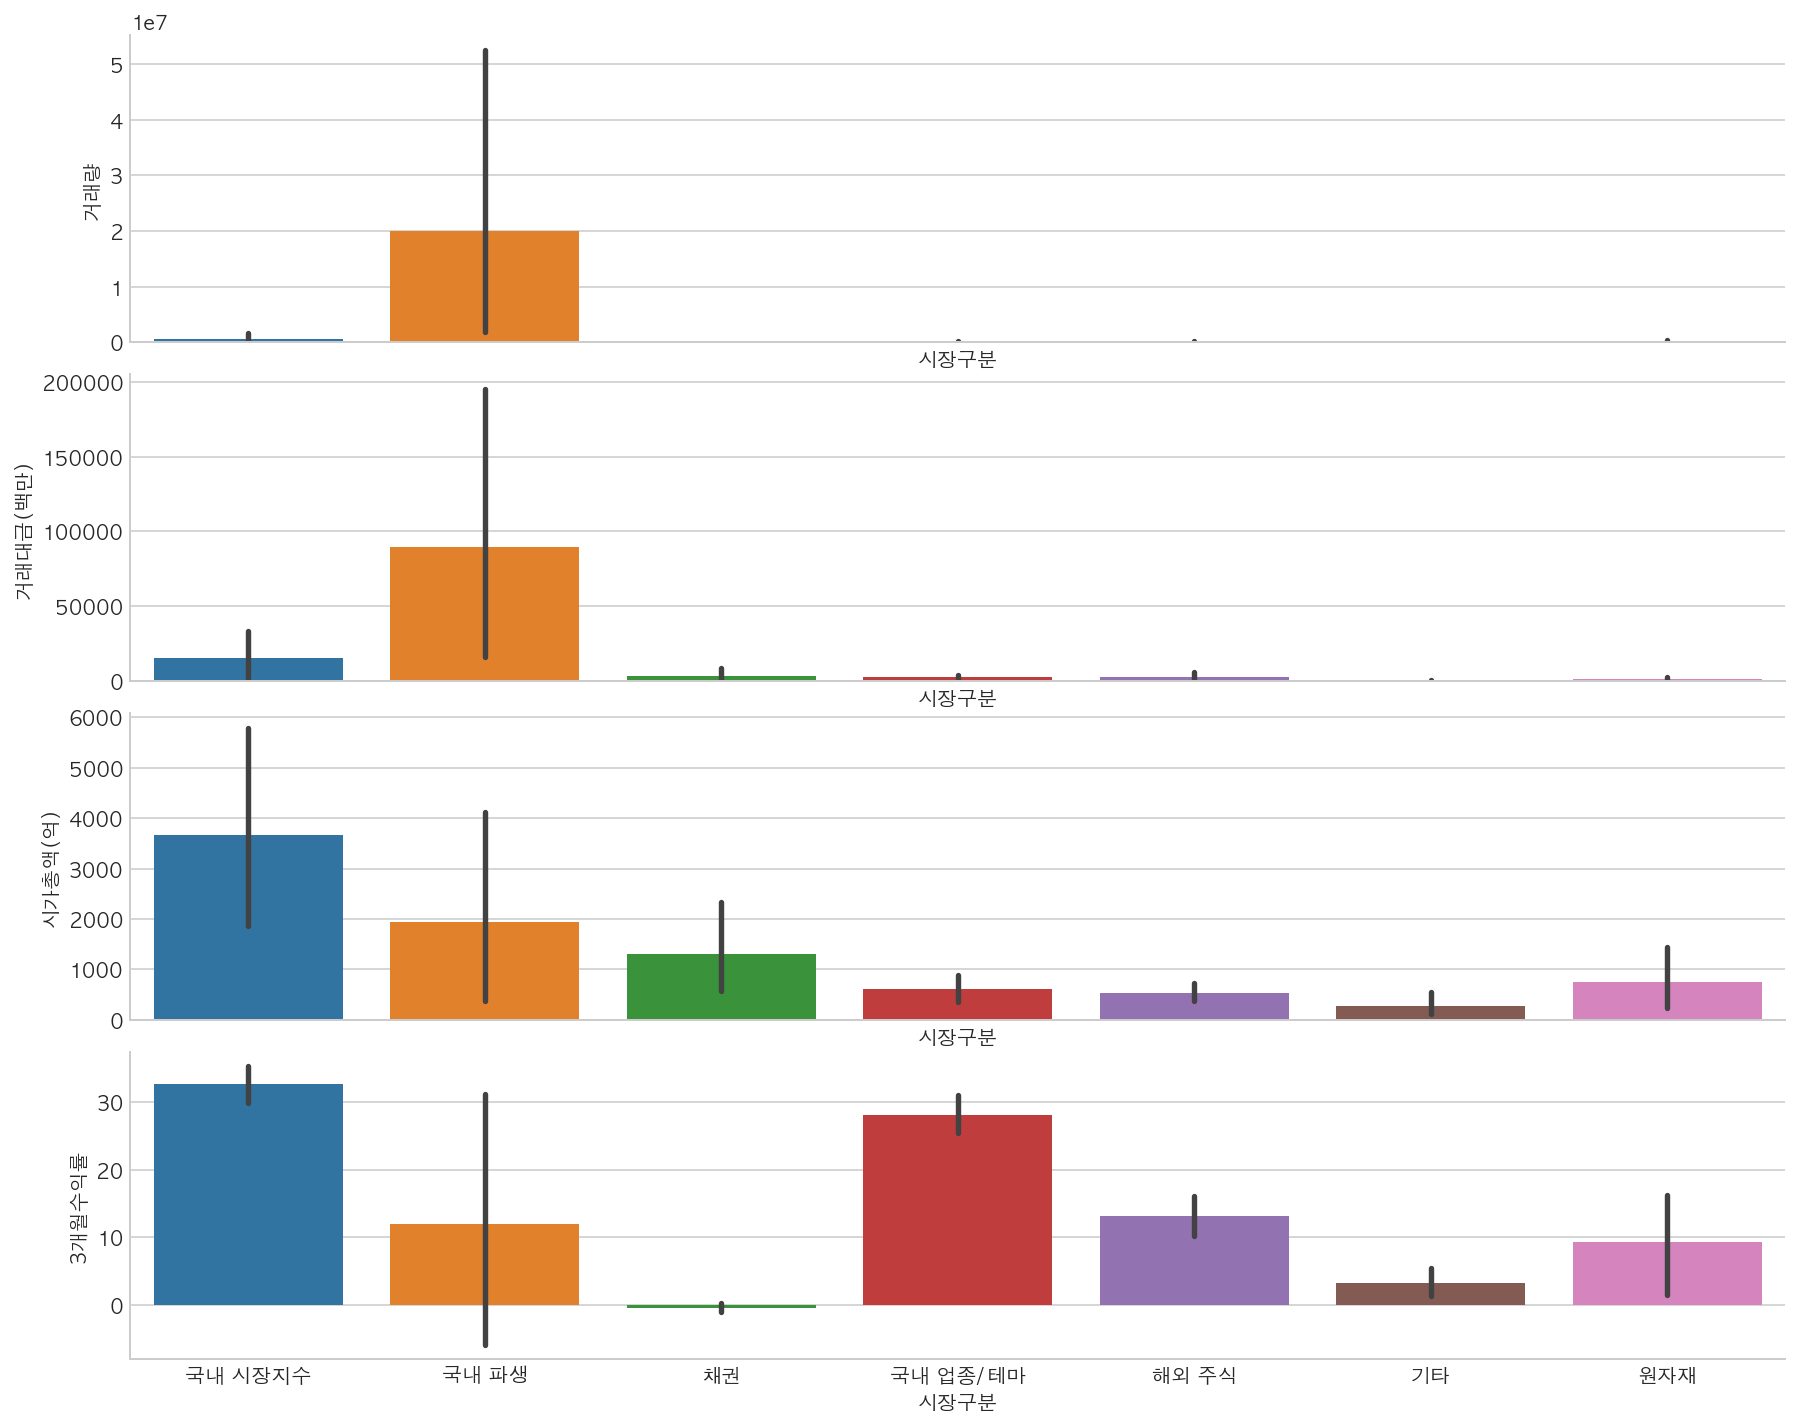

In [82]:
# PairGrid 와 barplot을 한번에 서브플롯으로 그립니다.
# 유형에 따른 "거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률" 에 대한 시각화를 합니다.
g = sns.PairGrid(data=df, 
             x_vars="유형", 
             y_vars=["거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률"], 
             aspect=5)
g.map(sns.barplot)
g.set(xlabel="시장구분")

### PairGrid 를 통해 여러 변수의 violinplot 그리기

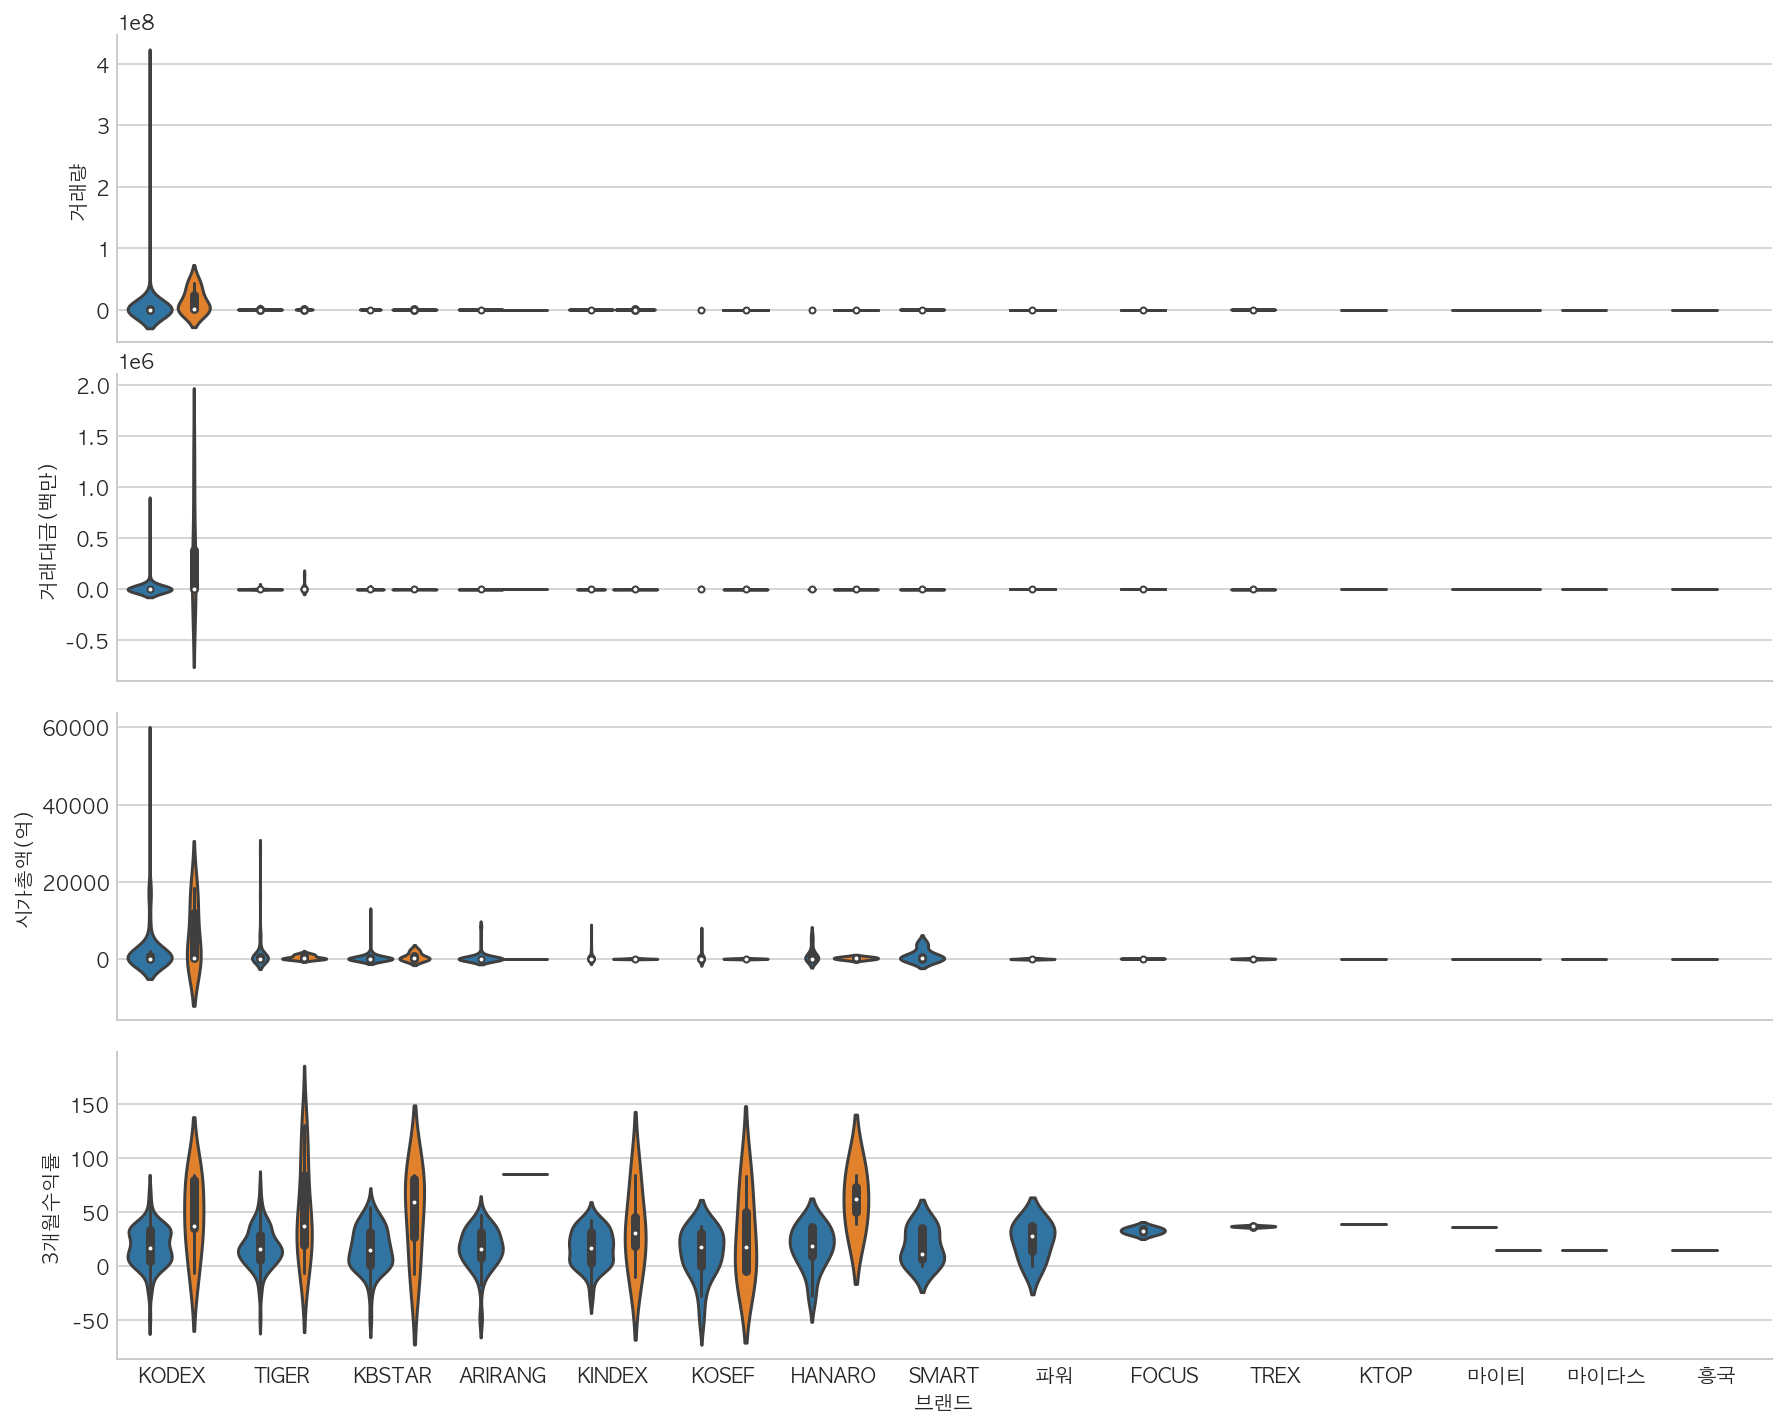

In [97]:
# 브랜드에 따른 여러 수치변수의 violinplot 를 PairGrid로 그리기
g = sns.PairGrid(data=df, x_vars="브랜드", y_vars=row_cols, aspect=5, hue="레버리지")
g.map(sns.violinplot)

## FacetGrid 를 통한 범주형 변수에 대한 서브플롯 그리기

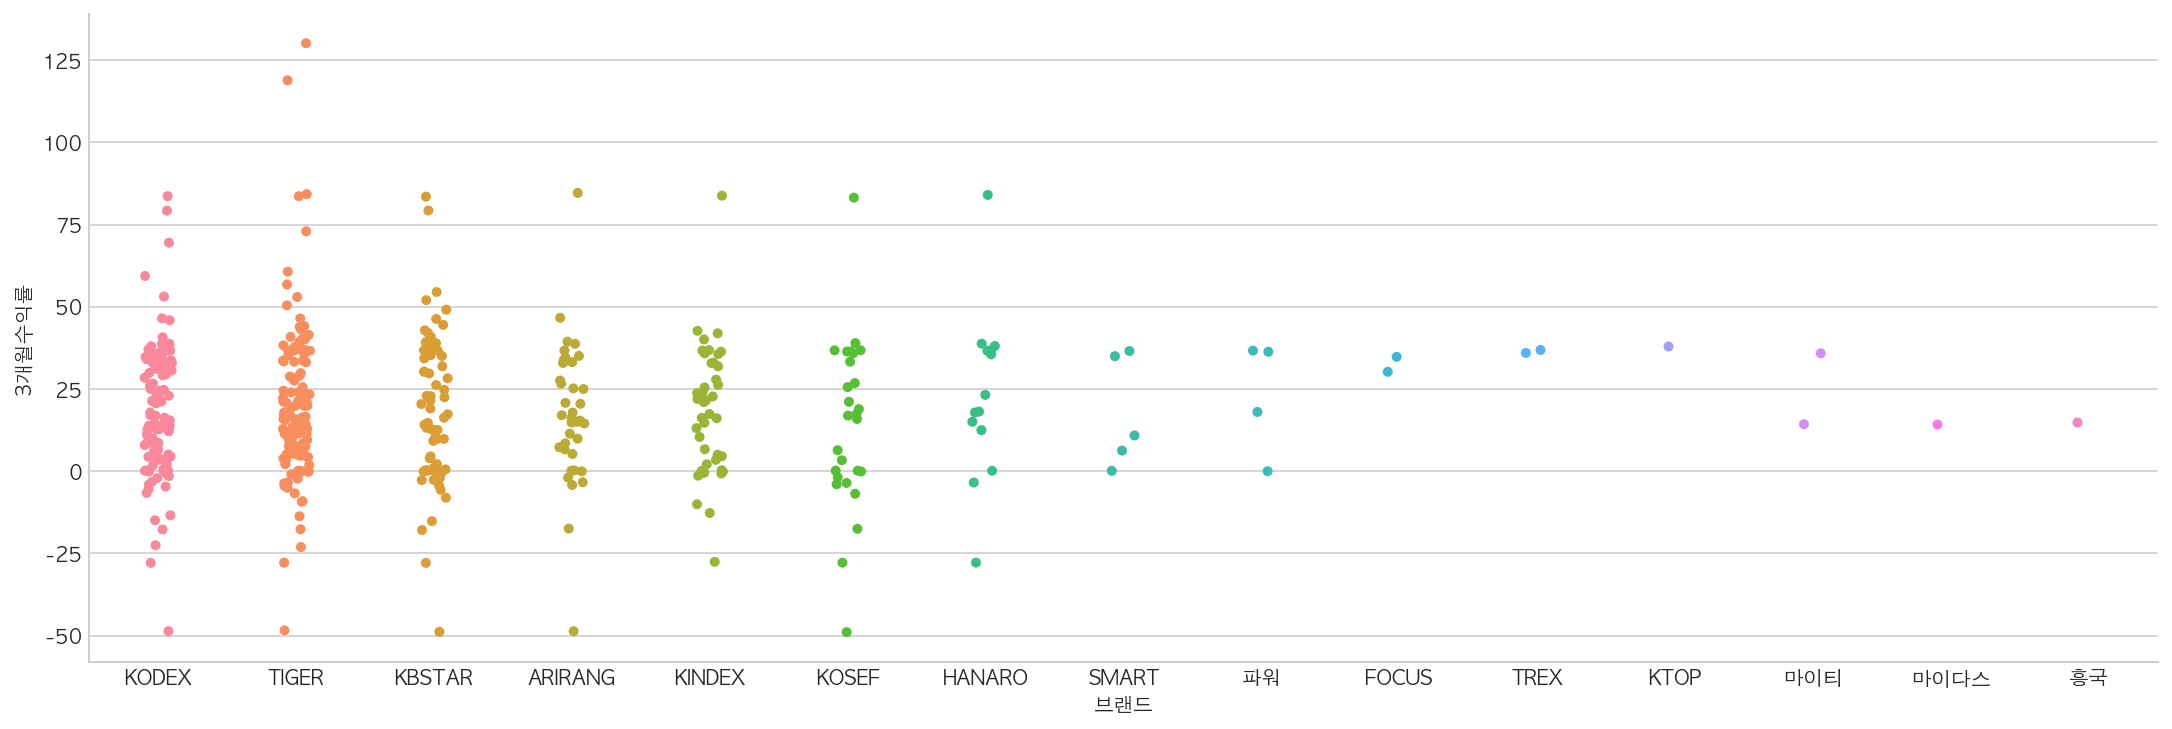

In [100]:
# catplot 을 통한 브랜드별 3개월 수익률
sns.catplot(data=df, x="브랜드", y="3개월수익률", aspect=3)

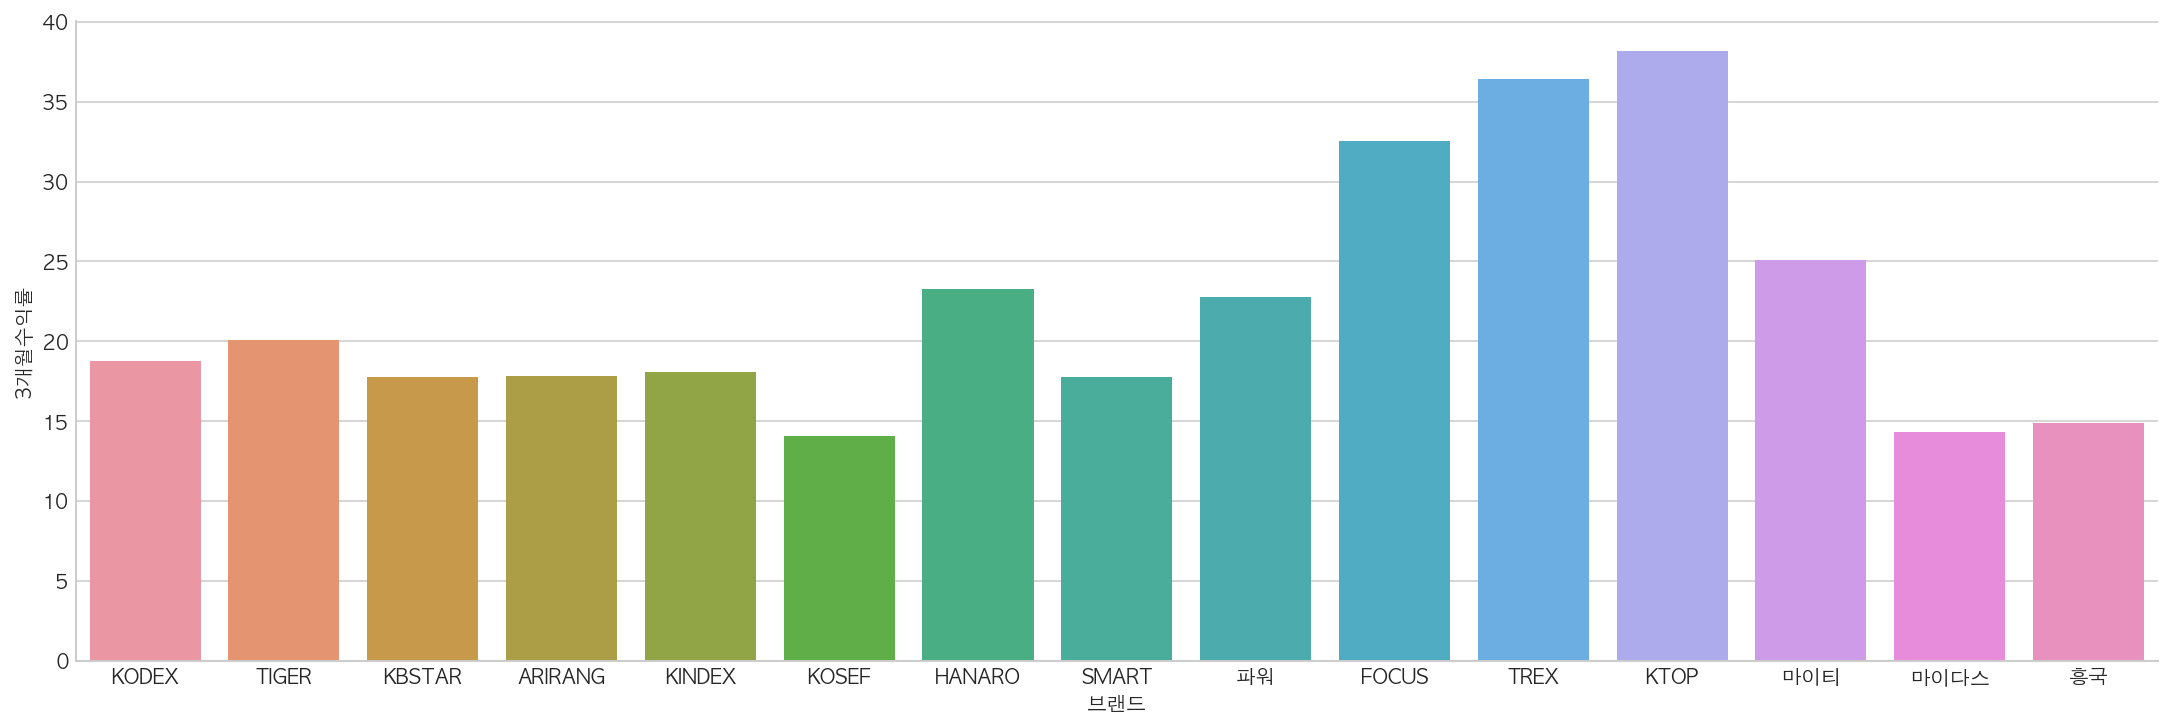

In [101]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="bar"

sns.catplot(data=df, x="브랜드", y="3개월수익률", aspect=3, kind="bar", ci=None)

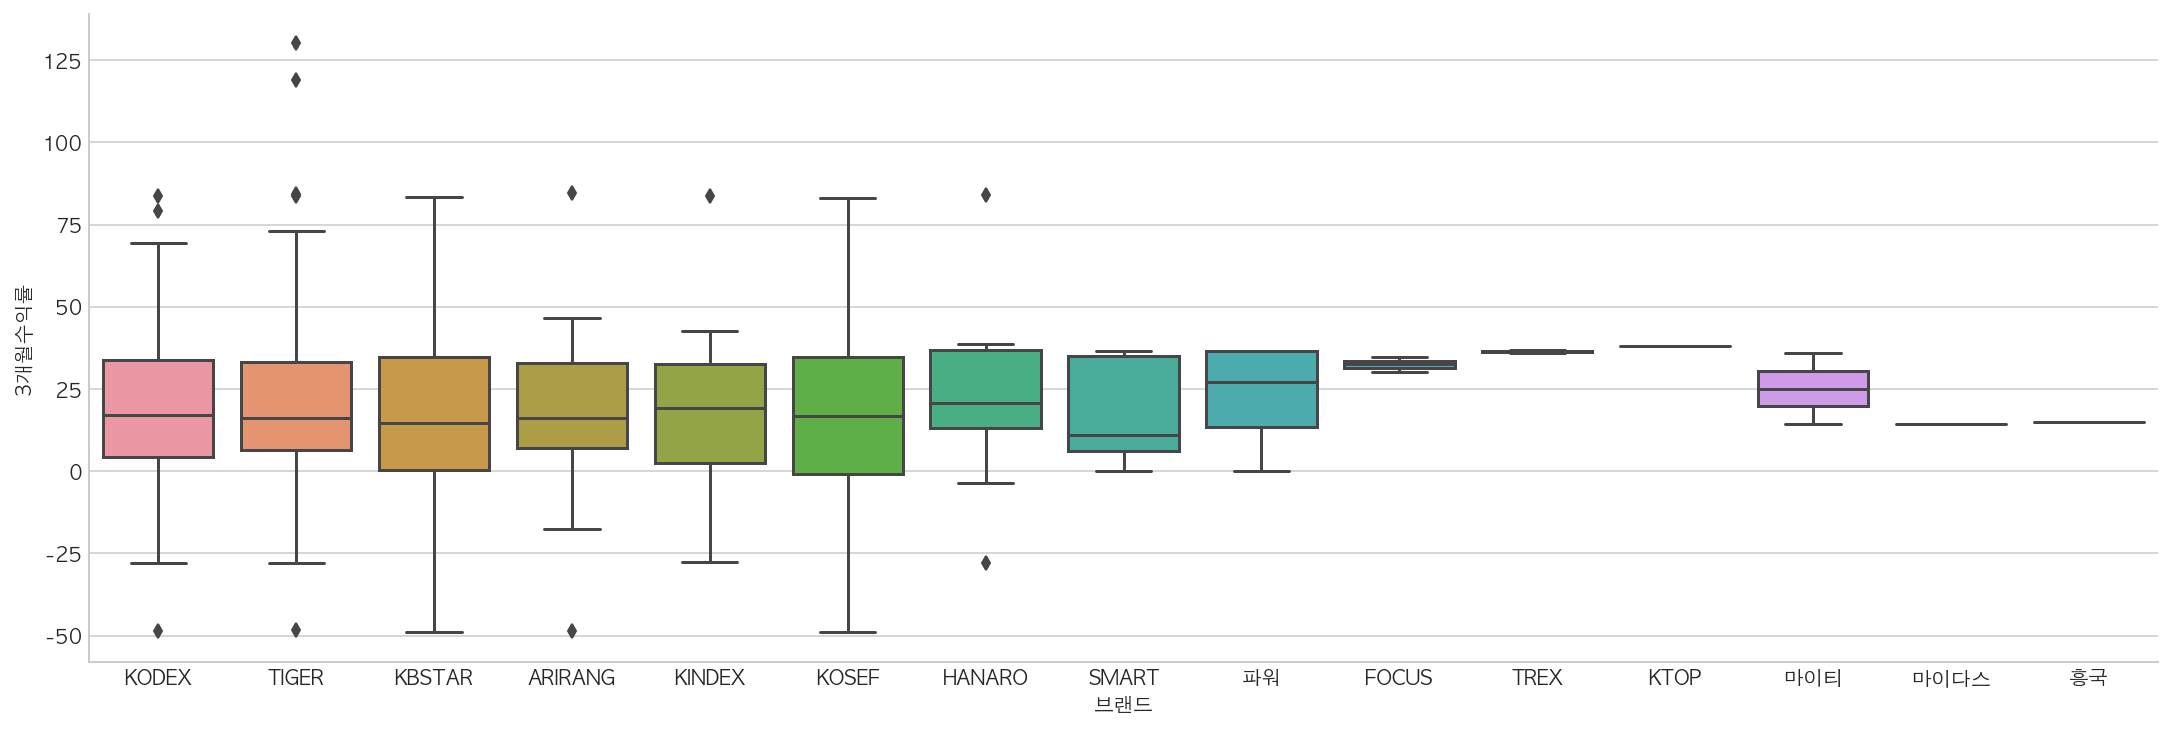

In [102]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="box"

sns.catplot(data=df, x="브랜드", y="3개월수익률", aspect=3, kind="box", ci=None)

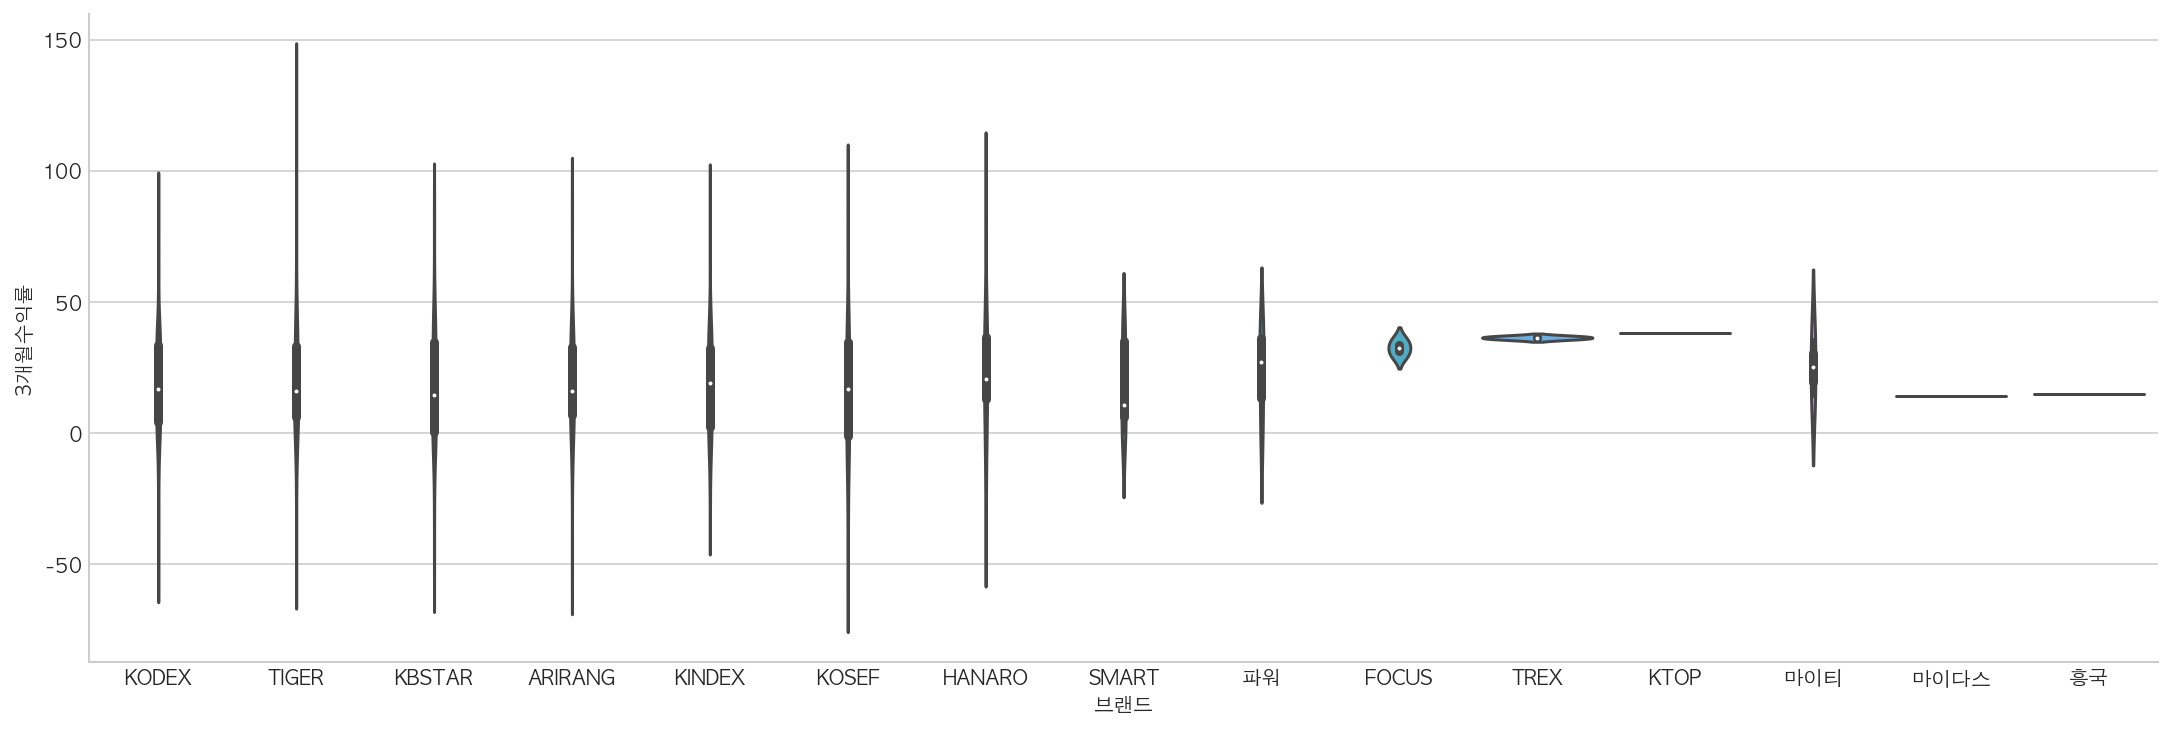

In [103]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="violin"

sns.catplot(data=df, x="브랜드", y="3개월수익률", aspect=3, kind="violin", ci=None)

### 특정 범주형 변수에 대한 서브플롯 그리기 - catplot
#### 브랜드 별 빈도수 - countplot

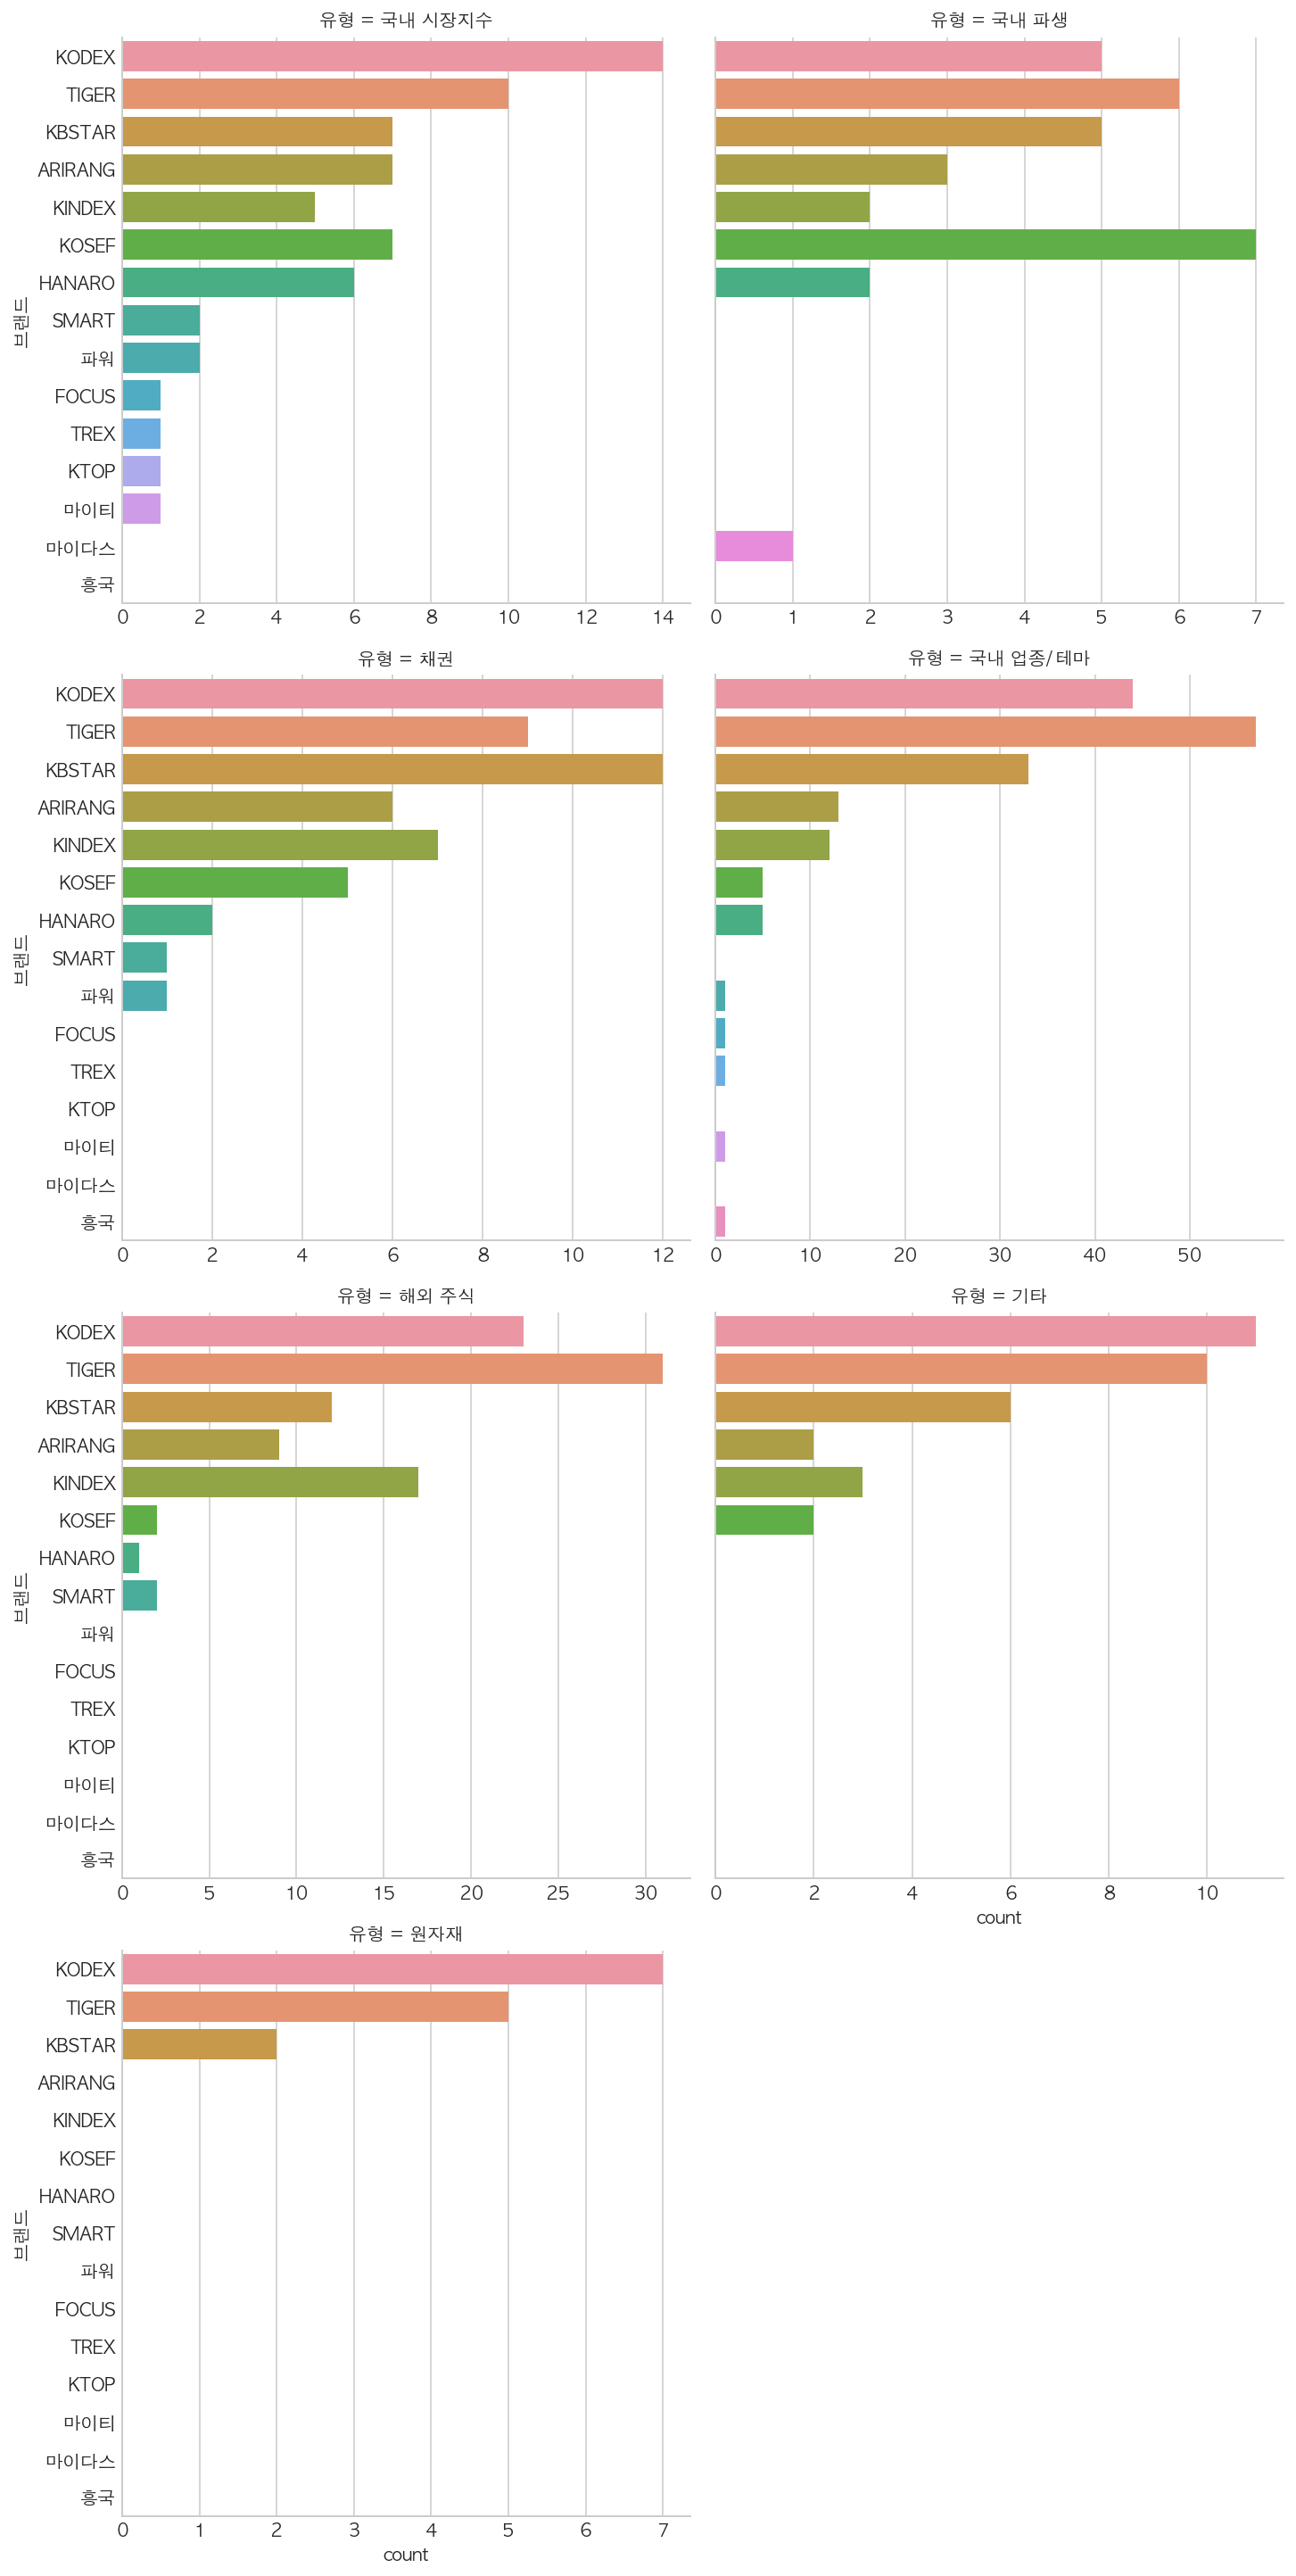

In [104]:
sns.catplot(data=df, y="브랜드", kind="count", sharex=False,
            col="유형", col_wrap=2)

#### 브랜드별 3개월 수익률 - barplot

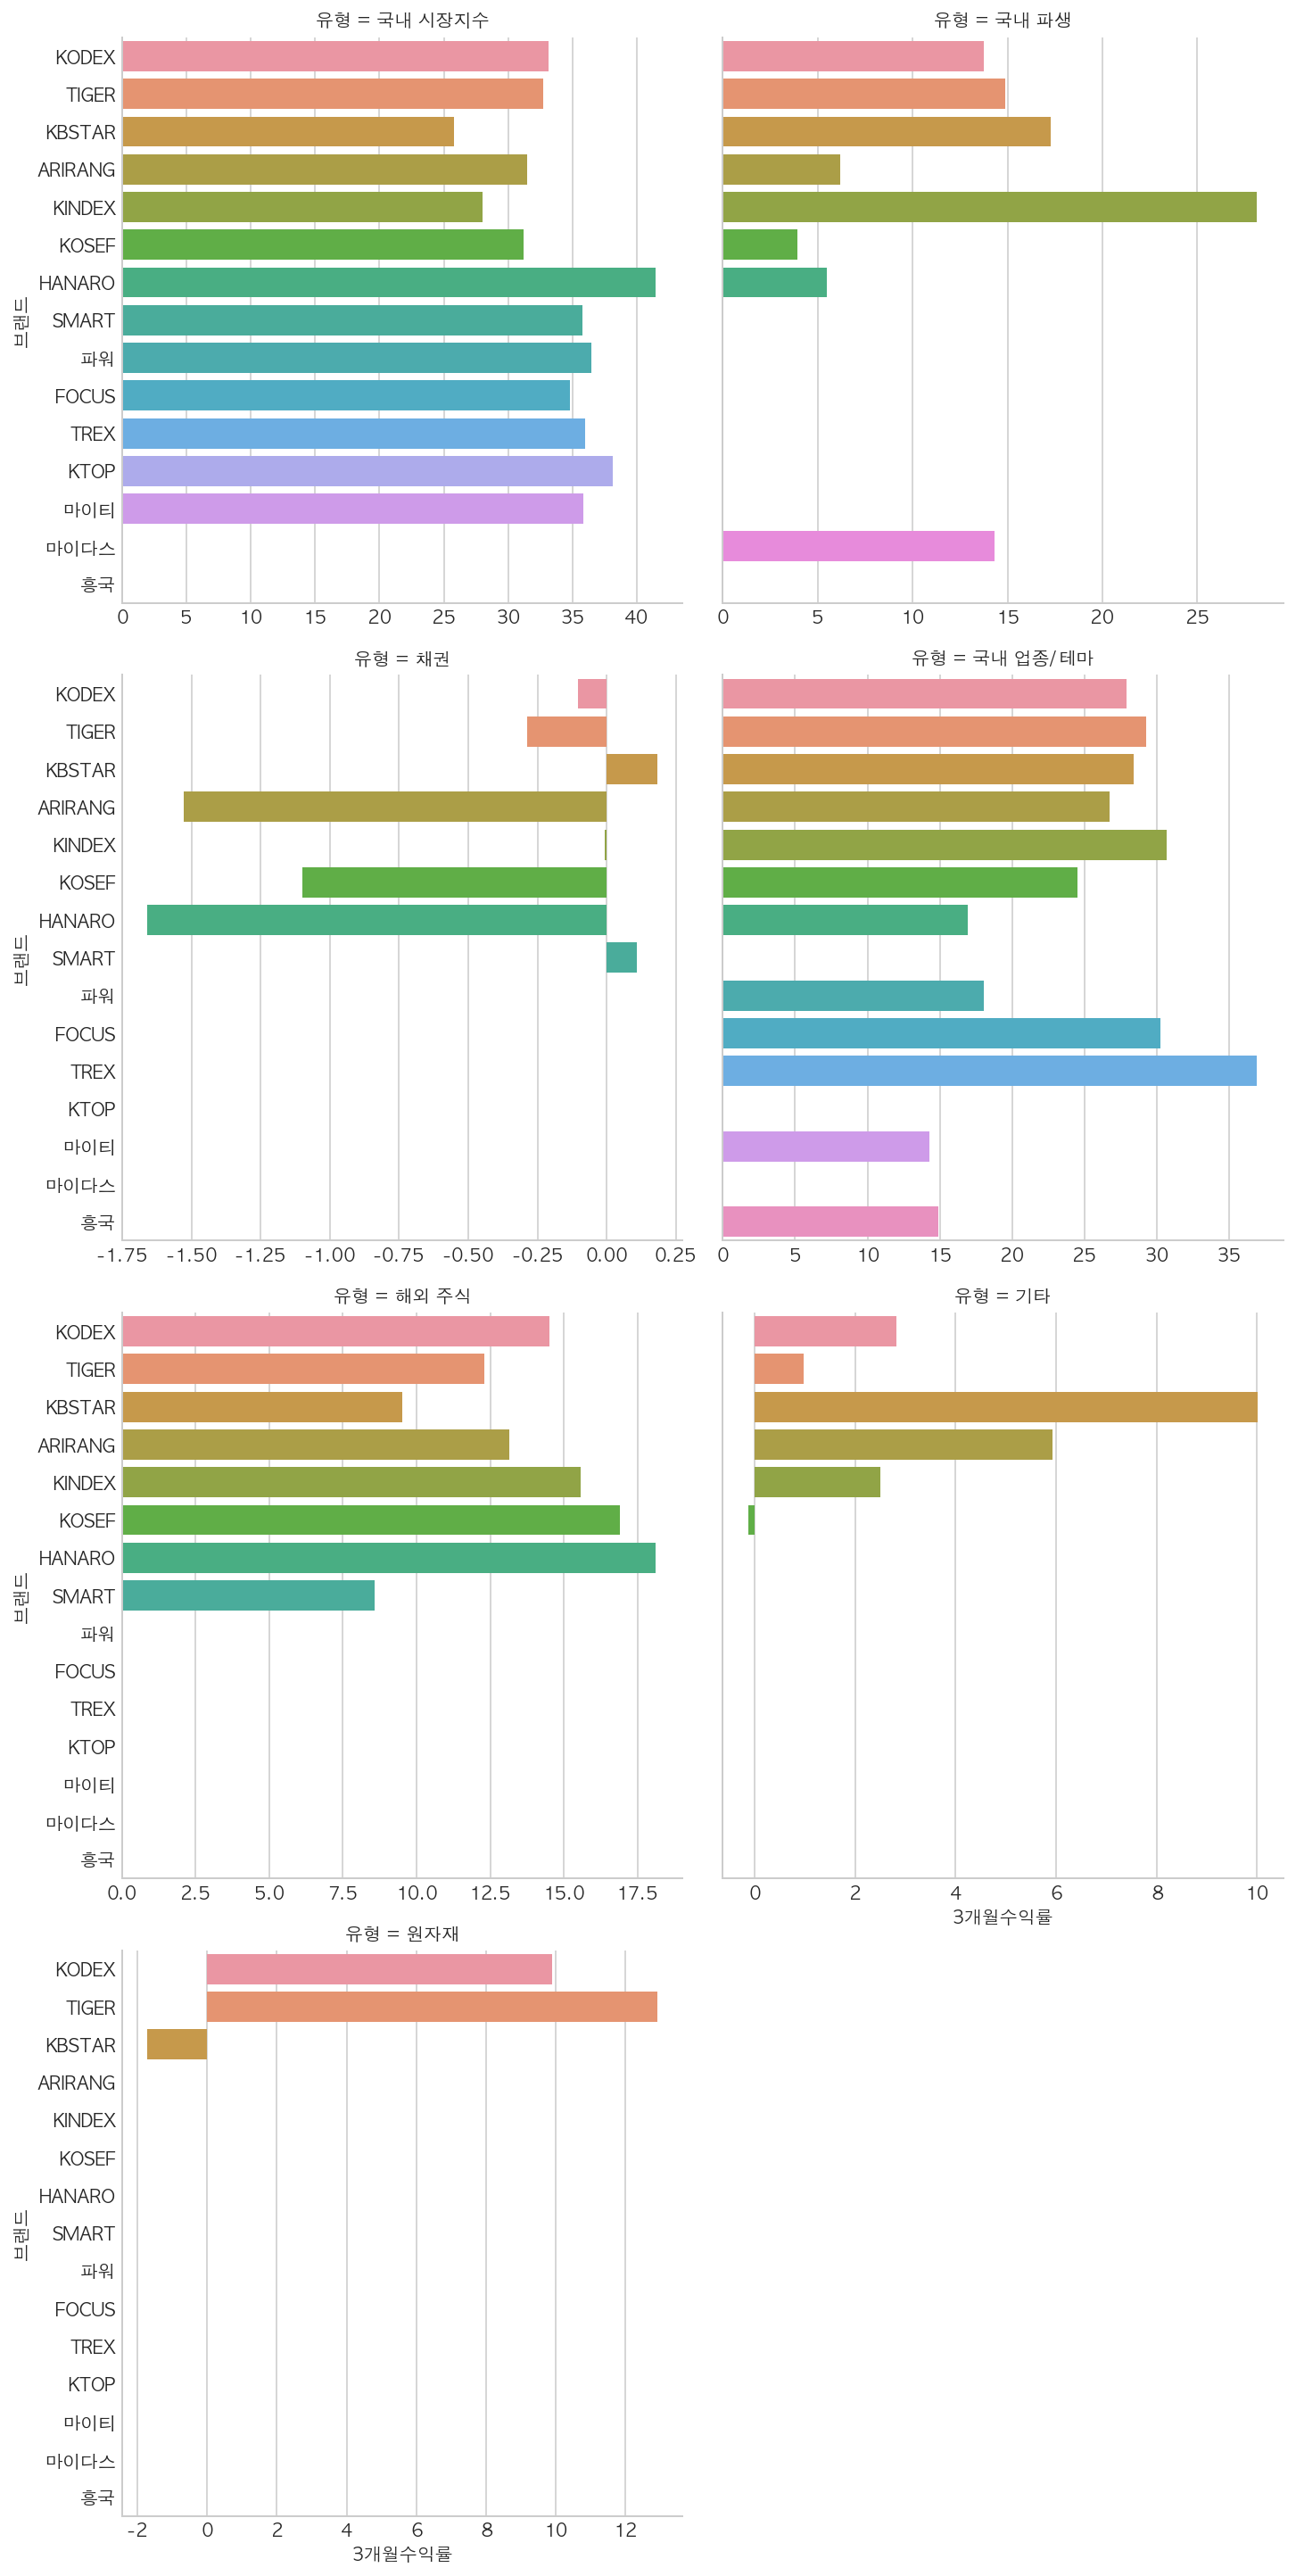

In [105]:
sns.catplot(data=df, y="브랜드", x="3개월수익률", kind="bar", sharex=False,
            col="유형", col_wrap=2, ci=None)

#### 브랜드별 거래량 - barplot

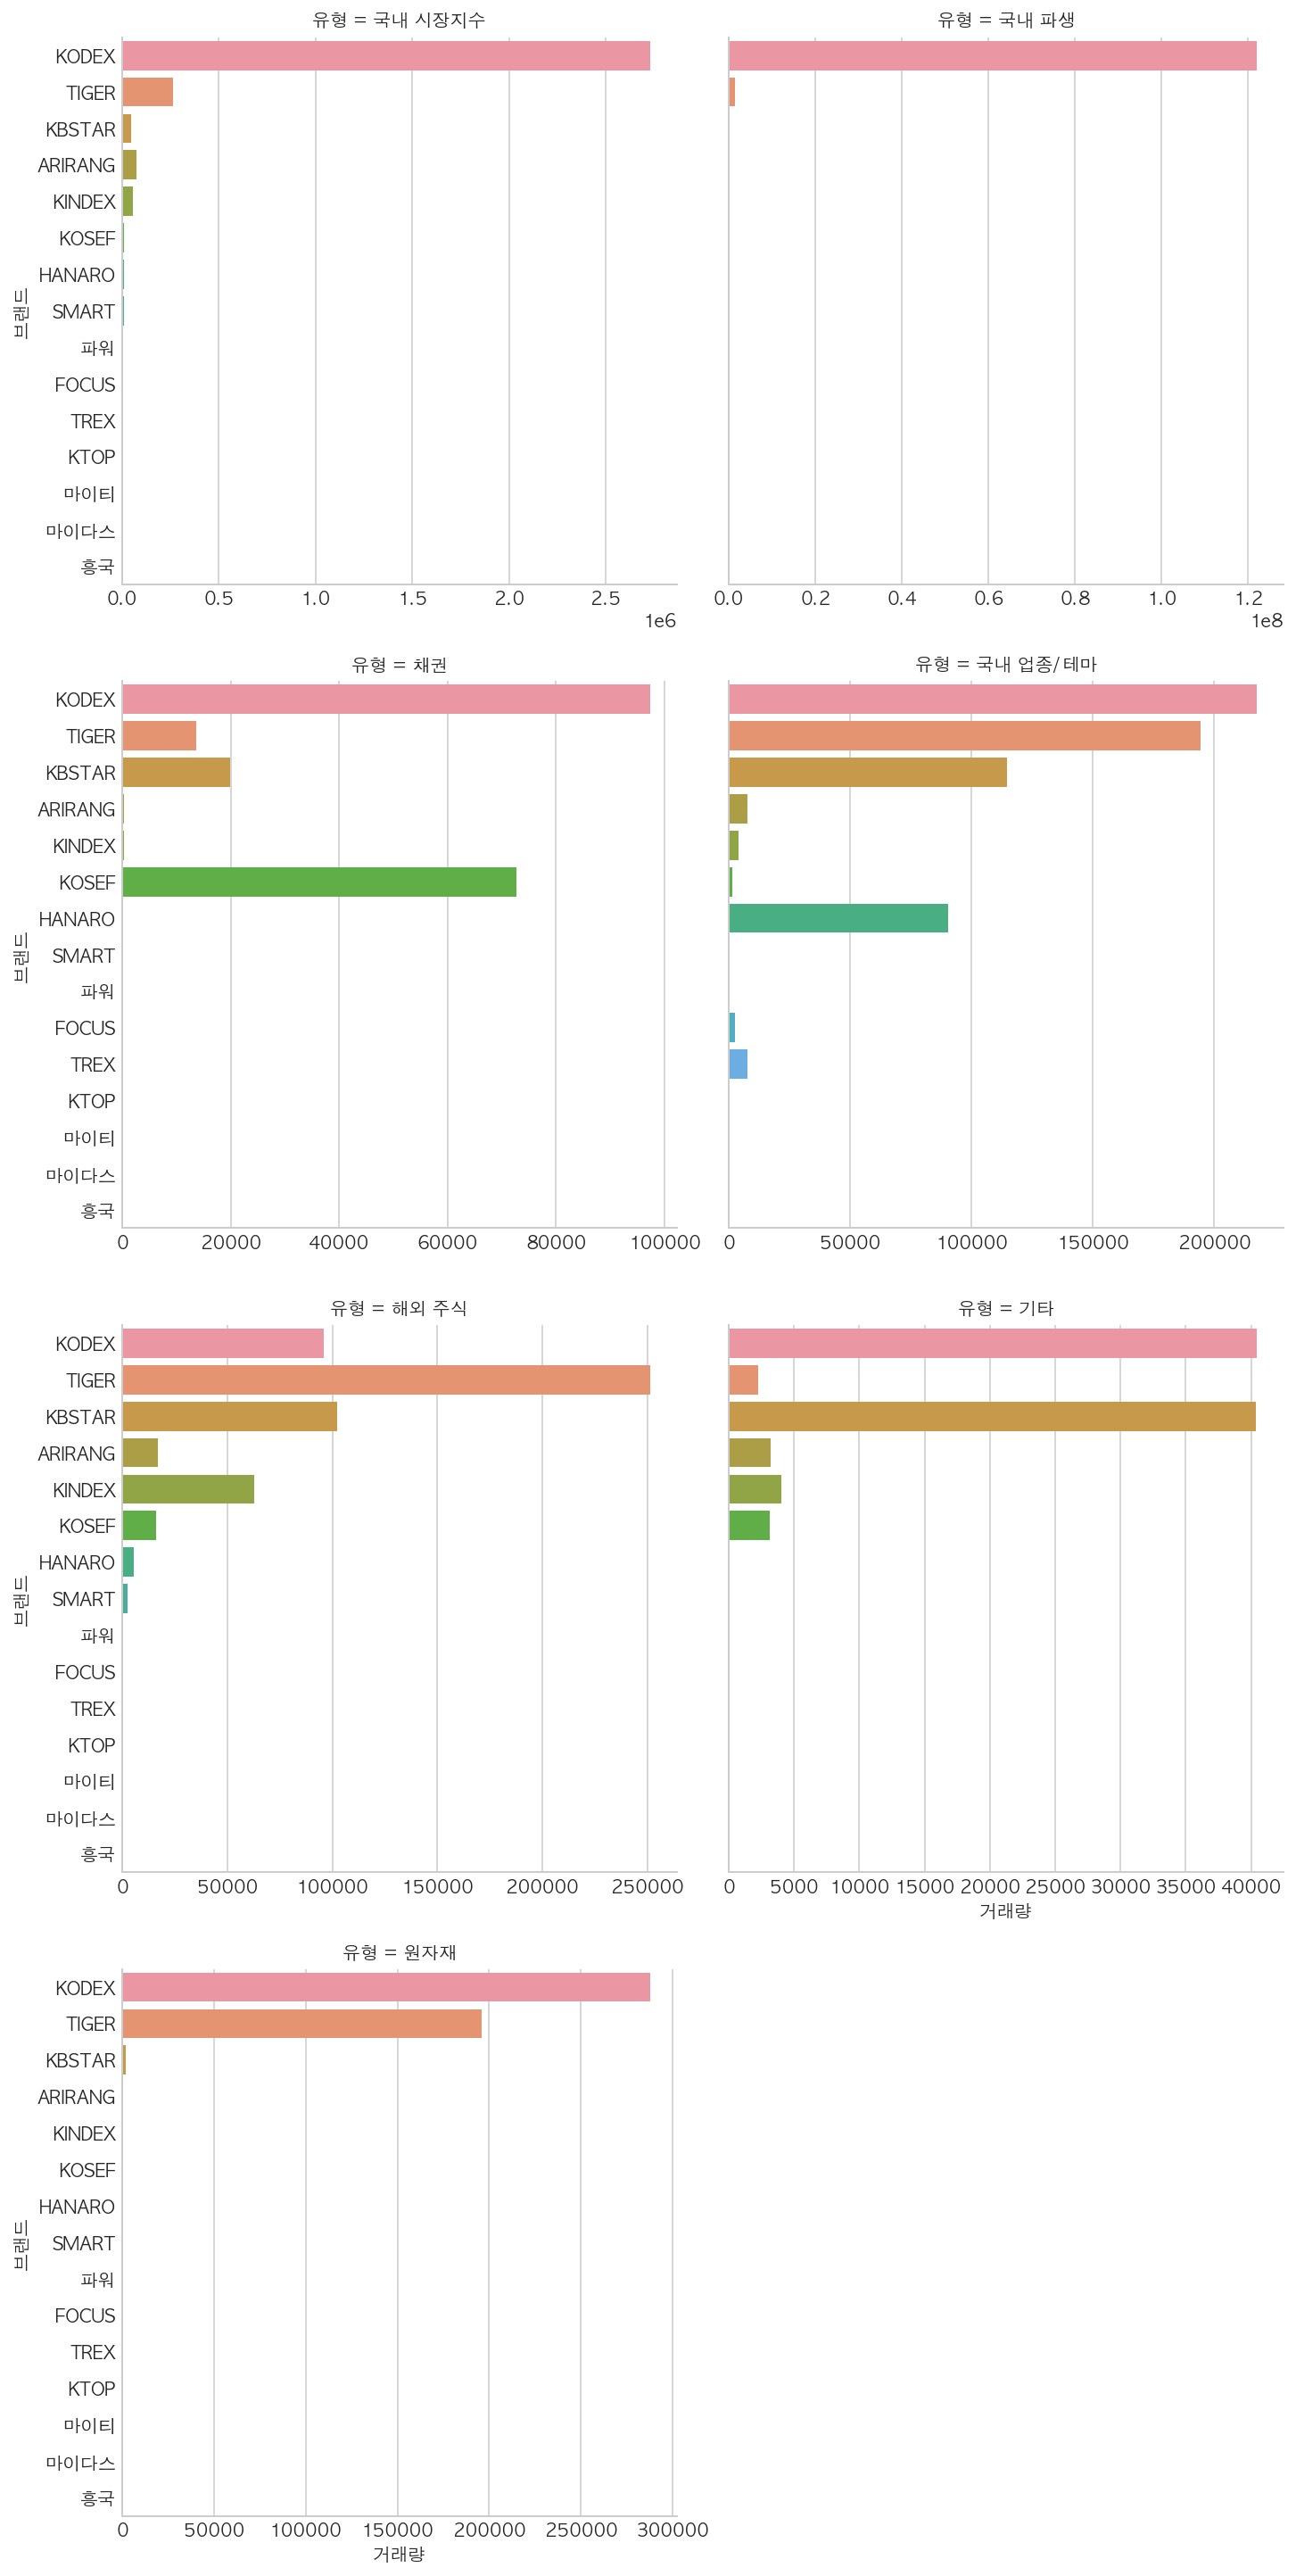

In [106]:
sns.catplot(data=df, y="브랜드", x="거래량", kind="bar", sharex=False,
            col="유형", col_wrap=2, ci=None)

## 해외 주식 ETF

In [107]:
# 유형이 "해외 주식"인 ETF만 가져옵니다.
oversea = df[df["유형"] == "해외 주식"]

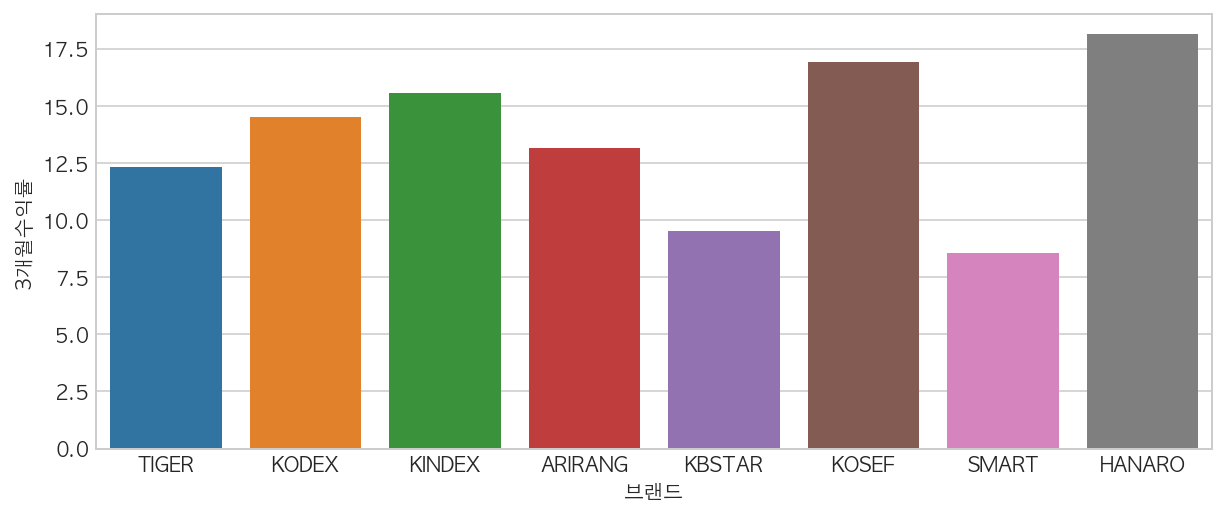

In [108]:
# "해외 주식"ETF의 브랜드별 "3개월수익률"을 시각화 합니다.
plt.figure(figsize=(10, 4))
sns.barplot(data=oversea, x="브랜드", y="3개월수익률", ci=None)

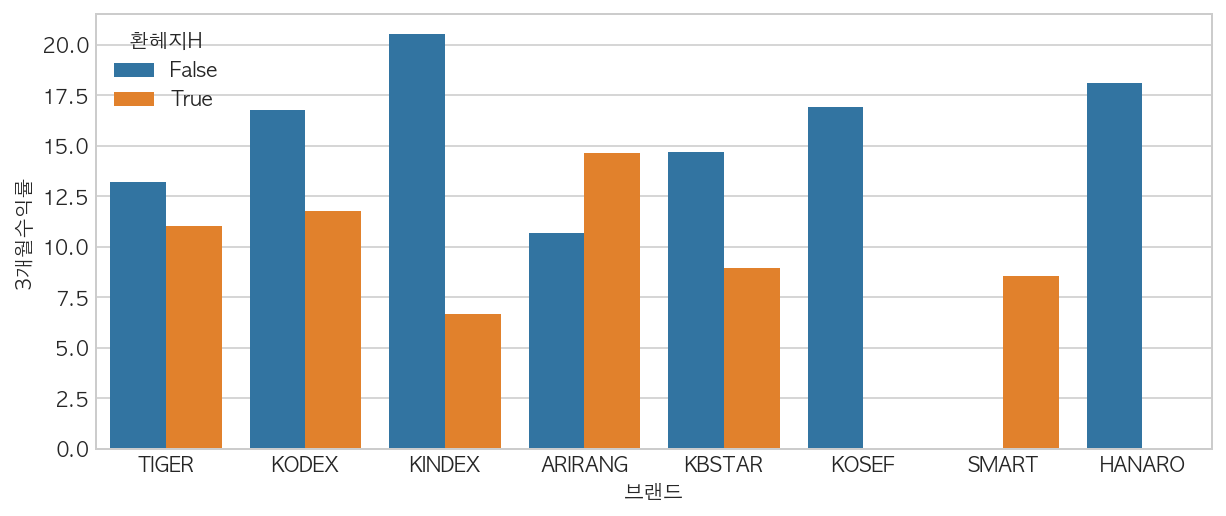

In [109]:
# "해외 주식"ETF의 브랜드별 평균 "3개월수익률"을 hue="환헤지H"로 시각화 합니다.

plt.figure(figsize=(10, 4))
sns.barplot(data=oversea, x="브랜드", y="3개월수익률", ci=None, hue="환헤지H")

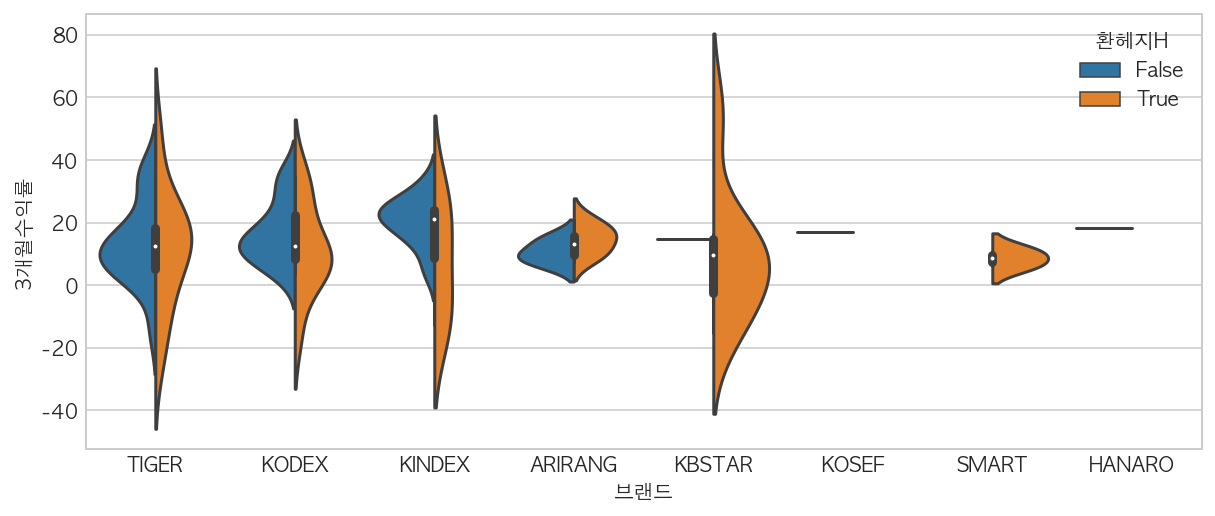

In [110]:
# "해외 주식"ETF의 브랜드별 평균 "3개월수익률"을 violinplot으로 시각화 합니다.

plt.figure(figsize=(10, 4))
sns.violinplot(data=oversea, x="브랜드", y="3개월수익률", ci=None, hue="환헤지H", split=True)

In [111]:
# import warnings
# warnings.filterwarnings('ignore')

/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


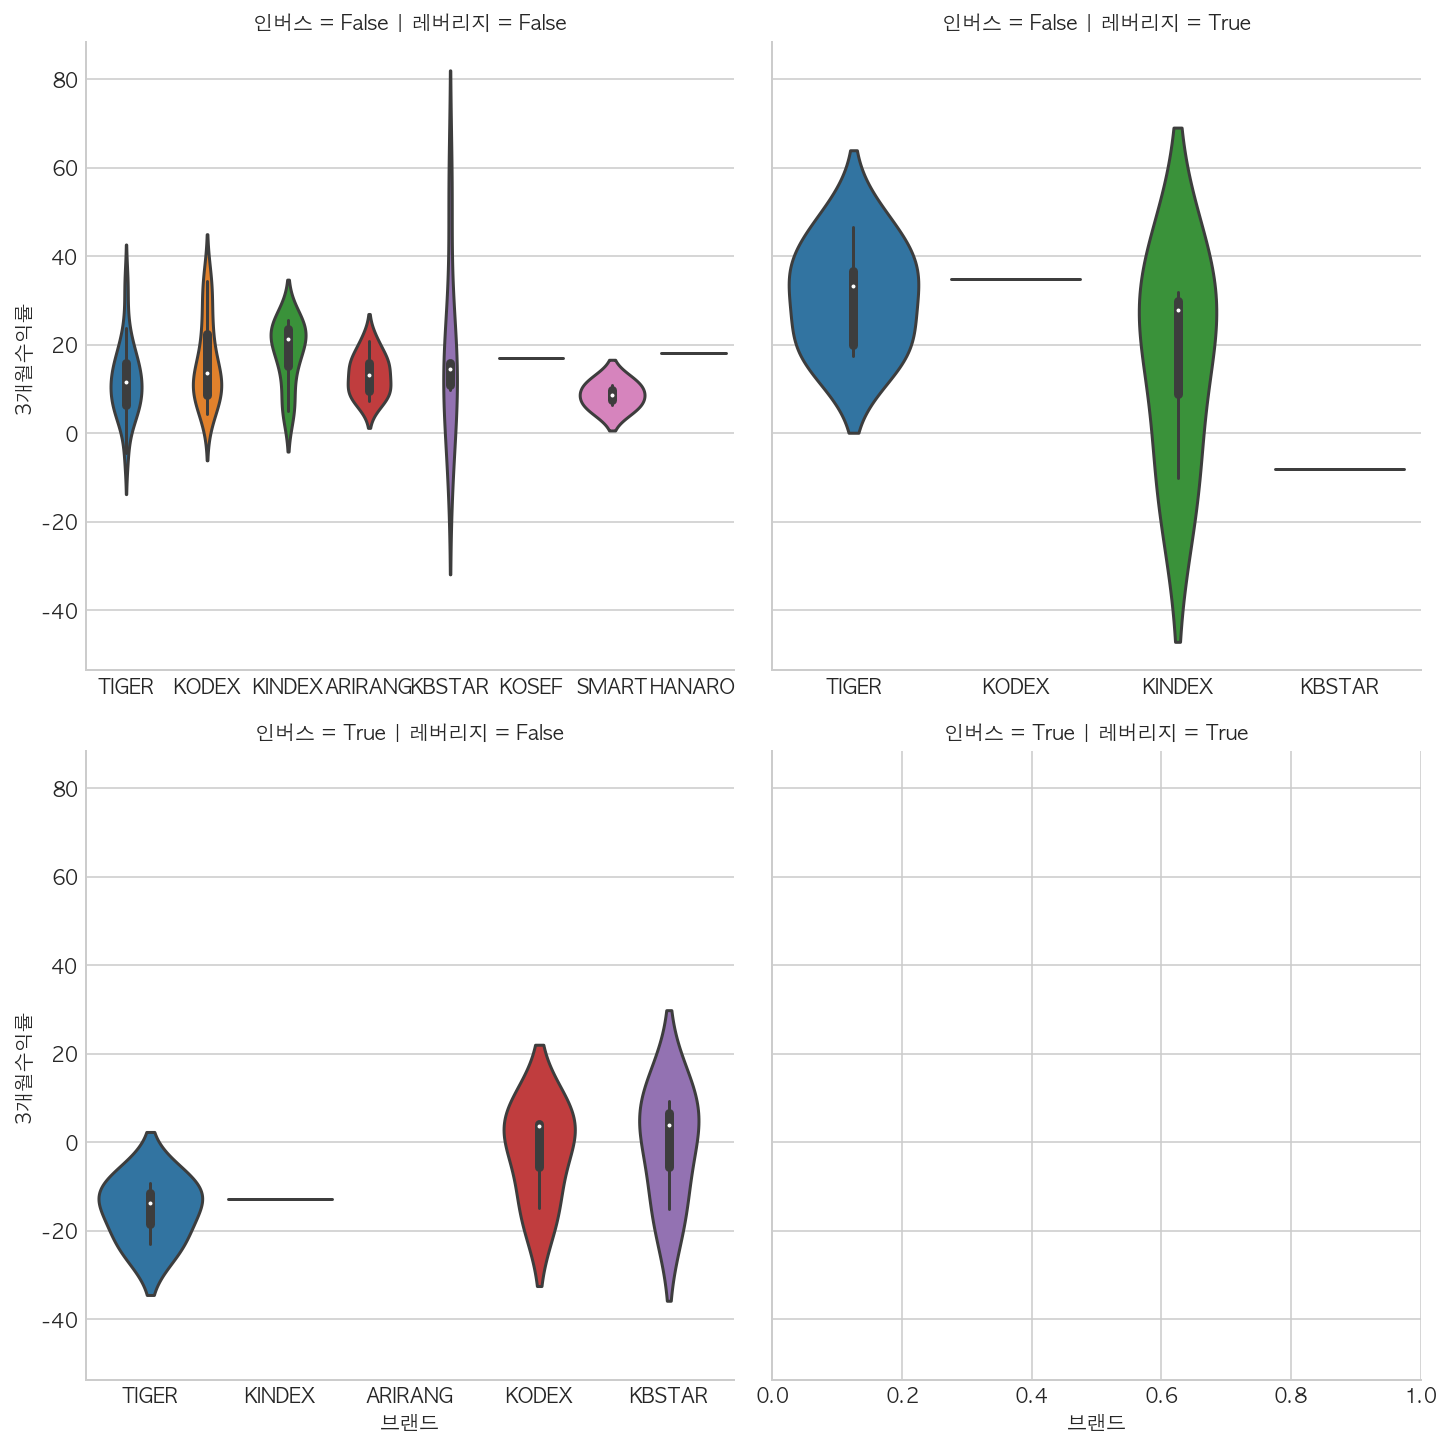

In [112]:
# 위에서 그린 그래프를 catplot을 통해 그리며  col="레버리지", row="인버스"로 시각화 합니다.
sns.catplot(data=oversea, x="브랜드", y="3개월수익률", kind="violin", sharex=False,
            col="레버리지", row="인버스")


## 상관분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다. 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

### 피어슨 상관계수

* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
* 결정계수(coefficient of determination)는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="500">

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" width=500>

* 출처 :  https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98



### 상관계수 구하기

In [113]:
corr = df.corr()

In [114]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 만듬

# 수식적으로 어려워 보일수도 있지만 간단함
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있음
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있음
# np.ones_like로 heatmap의 마스크값 구하기
mask = np.triu(np.ones_like(corr))

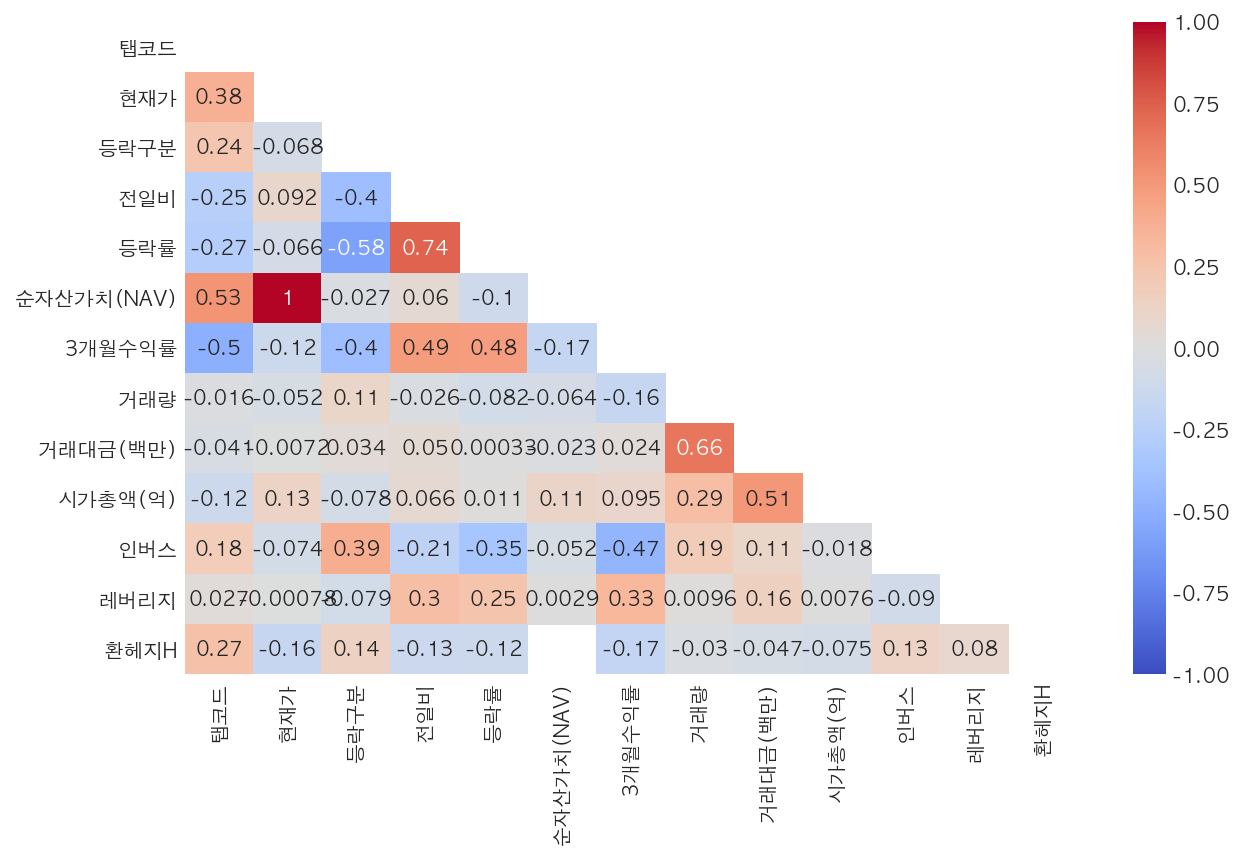

In [115]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmax=1, vmin=-1, mask=mask)

### 양 혹은 음의 상관 계수가 높은 변수끼리의 regplot 그리기

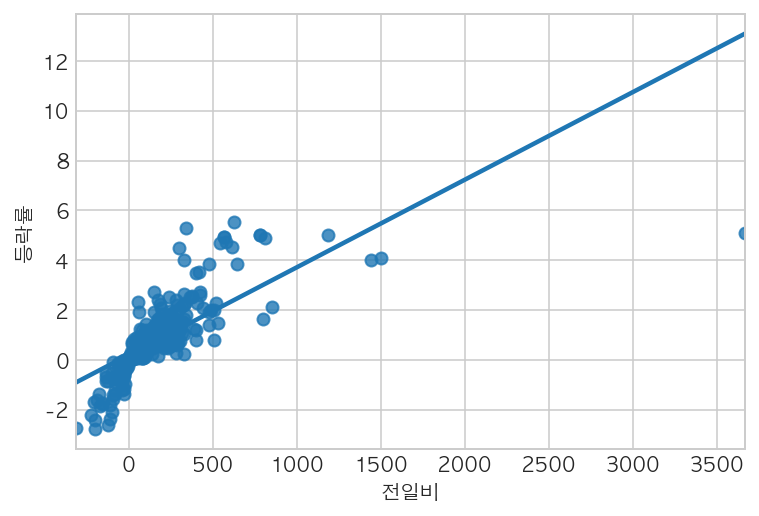

In [116]:
# regplot을 통해 양의 상관 계수가 높은 변수끼리 시각화 합니다.
sns.regplot(data=df, x="전일비", y="등락률", ci=None)

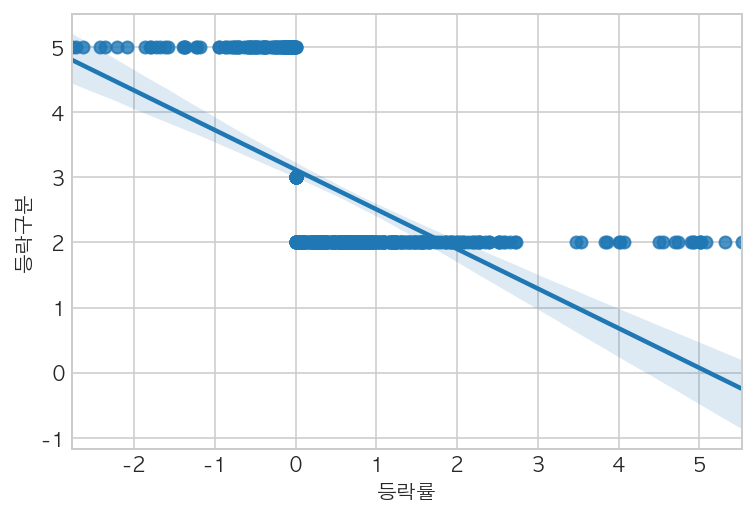

In [117]:
# regplot을 통해 음의 상관 계수가 높은 변수끼리 시각화 합니다.
sns.regplot(data=df, x="등락률", y="등락구분")

### 종목별 상관 계수

In [118]:
# select_dtypes 를 통해 object 타입을 제외한 타입을 제외하고 가져오록 합니다.
# 종목명을 인덱스로 만들어 줍니다.
df_num = df.select_dtypes(exclude=np.object).copy()
df_num["종목명"] = df["종목명"]
df_num = df_num.set_index("종목명")

In [119]:
# transpose 로 행과 열을 바꿉니다.
df_t = df_num.T

In [120]:
# df_t의 데이터 타입을 float 으로 변경하고 상관 계수 구하기
etf_corr = df_t.astype(float).corr()
etf_corr

종목명,KODEX 200,TIGER 200,KODEX 200선물인버스2X,KODEX 단기채권,KODEX 레버리지,KODEX MSCI Korea TR,KODEX 삼성그룹,KODEX 200TR,TIGER MSCI Korea TR,KODEX 종합채권(AA-이상)액티브,...,KBSTAR 차이나H선물인버스(H),TIGER 일본엔선물인버스2X,TIGER 금속선물(H),ARIRANG KRX300IT,KBSTAR 200금융,KBSTAR 200중공업,KBSTAR 200경기소비재,KBSTAR 팔라듐선물인버스(H),KBSTAR 미국장기국채선물인버스2X(합성 H),KBSTAR 200철강소재
종목명,,,,,,,,,,,,,,,,,,,,,
KODEX 200,1.000000,0.998921,0.999193,-0.008189,0.999874,0.997170,0.998609,0.996917,0.995222,-0.052555,...,-0.007335,-0.123453,0.425085,-0.116338,-0.007945,-0.073474,0.521820,0.144822,0.212472,0.890125
TIGER 200,0.998921,1.000000,0.998066,0.036392,0.998594,0.999091,0.999226,0.999022,0.998424,-0.008420,...,0.024127,-0.081131,0.453264,-0.074046,0.034564,-0.031012,0.557441,0.175813,0.243034,0.908436
KODEX 200선물인버스2X,0.999193,0.998066,1.000000,-0.009161,0.999679,0.997409,0.999013,0.997159,0.995306,-0.053347,...,-0.007633,-0.123788,0.425184,-0.116615,-0.008236,-0.073796,0.521815,0.144747,0.212351,0.890544
KODEX 단기채권,-0.008189,0.036392,-0.009161,1.000000,-0.011770,0.046210,0.020677,0.050170,0.074186,0.998513,...,0.982426,0.984970,0.916420,0.985294,0.991454,0.989333,0.840642,0.981389,0.973562,0.442732
KODEX 레버리지,0.999874,0.998594,0.999679,-0.011770,1.000000,0.997129,0.998751,0.996862,0.995024,-0.055973,...,-0.009527,-0.126371,0.423318,-0.119225,-0.010845,-0.076389,0.519543,0.142770,0.210439,0.889180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KBSTAR 200중공업,-0.073474,-0.031012,-0.073796,0.989333,-0.076389,-0.024807,-0.048471,-0.020944,0.002616,0.994880,...,0.999788,0.998727,0.894839,0.998970,0.997846,1.000000,0.812155,0.985766,0.971843,0.387912
KBSTAR 200경기소비재,0.521820,0.557441,0.521815,0.840642,0.519543,0.562148,0.542861,0.565302,0.584379,0.819593,...,0.737259,0.781858,0.956803,0.786353,0.848651,0.812155,1.000000,0.831730,0.867659,0.852737
KBSTAR 팔라듐선물인버스(H),0.144822,0.175813,0.144747,0.981389,0.142770,0.180384,0.163226,0.183119,0.200186,0.981273,...,0.988177,0.972029,0.957082,0.974188,0.996748,0.985766,0.831730,1.000000,0.997473,0.476879


* "KODEX 200" 과 상관계수가 높은 ETF 상위 10개

In [130]:
# "KODEX 200" 과 상관계수가 높은 ETF 상위 10개
etf_corr["KODEX 200"].sort_values(ascending=False).head(20)

종목명
KODEX 200                  1.000000
TIGER 차이나CSI300레버리지(합성)    0.999943
KODEX 레버리지                 0.999874
KODEX 자동차                  0.999810
KODEX 2차전지산업               0.999725
KODEX 코스닥150 레버리지          0.999652
TIGER 2차전지테마               0.999629
TIGER KRX2차전지K-뉴딜          0.999620
KODEX 코스닥 150              0.999620
KBSTAR Fn수소경제테마            0.999559
TIGER 차이나전기차SOLACTIVE      0.999528
TIGER TOP10                0.999510
KBSTAR ESG사회책임투자           0.999459
KODEX 차이나항셍테크              0.999403
TIGER 차이나항셍테크              0.999391
KBSTAR 미국나스닥100            0.999380
KODEX WTI원유선물(H)           0.999373
TIGER 미디어컨텐츠               0.999340
TIGER 차이나CSI300            0.999327
TIGER KRX BBIG K-뉴딜        0.999324
Name: KODEX 200, dtype: float64

* "KODEX 200" 과 상관계수가 낮은 ETF 하위 10개

In [122]:
# "KODEX 200" 과 상관계수가 낮은 ETF 하위 10개

etf_corr["KODEX 200"].sort_values().head(10)

종목명
HANARO MSCI Korea TR   -0.130381
TIGER CD금리투자KIS(합성)    -0.129103
ARIRANG 코스피TR          -0.126639
KODEX 코스피TR            -0.125056
KODEX 200동일가중          -0.124897
KODEX MSCI모멘텀          -0.124690
HANARO 단기통안채           -0.124399
KBSTAR 중소형모멘텀로우볼       -0.124177
TIGER 200커버드콜5%OTM     -0.123936
KOSEF 미국달러선물인버스        -0.123911
Name: KODEX 200, dtype: float64

### 2X ETF의 상관계수

In [123]:
# 2X가 들어가는 ETF의 상관 계수만 가져오기
etf_corr_2x = etf_corr.filter(regex="2X").filter(regex="2X", axis=0)
etf_corr_2x

종목명,KODEX 200선물인버스2X,TIGER 200선물인버스2X,KBSTAR 200선물인버스2X,KOSEF 미국달러선물인버스2X,ARIRANG 200선물인버스2X,TIGER 미국달러선물인버스2X,KOSEF 200선물인버스2X,KBSTAR KRX국채선물3년10년스티프너2X,KBSTAR KRX국채선물3년10년플래트너2X,KODEX 미국달러선물인버스2X,TIGER 일본엔선물인버스2X,KBSTAR 미국장기국채선물인버스2X(합성 H)
종목명,,,,,,,,,,,,
KODEX 200선물인버스2X,1.000000,1.000000,0.999997,0.180954,0.999583,-0.103612,0.999948,-0.123362,-0.123454,0.982153,-0.123788,0.212351
TIGER 200선물인버스2X,1.000000,1.000000,0.999998,0.181407,0.999597,-0.103155,0.999953,-0.122907,-0.122999,0.982239,-0.123333,0.212684
KBSTAR 200선물인버스2X,0.999997,0.999998,1.000000,0.183275,0.999649,-0.101265,0.999969,-0.121022,-0.121114,0.982593,-0.121447,0.214058
KOSEF 미국달러선물인버스2X,0.180954,0.181407,0.183275,1.000000,0.209189,0.959428,0.190969,0.953549,0.953524,0.362520,0.953444,0.994618
ARIRANG 200선물인버스2X,0.999583,0.999597,0.999649,0.209189,1.000000,-0.074942,0.999825,-0.094752,-0.094844,0.987168,-0.095178,0.233146
TIGER 미국달러선물인버스2X,-0.103612,-0.103155,-0.101265,0.959428,-0.074942,1.000000,-0.093470,0.999766,0.999764,0.085125,0.999772,0.961314
KOSEF 200선물인버스2X,0.999948,0.999953,0.999969,0.190969,0.999825,-0.093470,1.000000,-0.113243,-0.113335,0.984017,-0.113669,0.219737
KBSTAR KRX국채선물3년10년스티프너2X,-0.123362,-0.122907,-0.121022,0.953549,-0.094752,0.999766,-0.113243,1.000000,0.999999,0.065314,0.999998,0.953614
KBSTAR KRX국채선물3년10년플래트너2X,-0.123454,-0.122999,-0.121114,0.953524,-0.094844,0.999764,-0.113335,0.999999,1.000000,0.065222,0.999997,0.953550


In [124]:
# np.ones_like로 heatmap의 마스크값 구하기
mask_2x = np.triu(np.ones_like(etf_corr_2x))

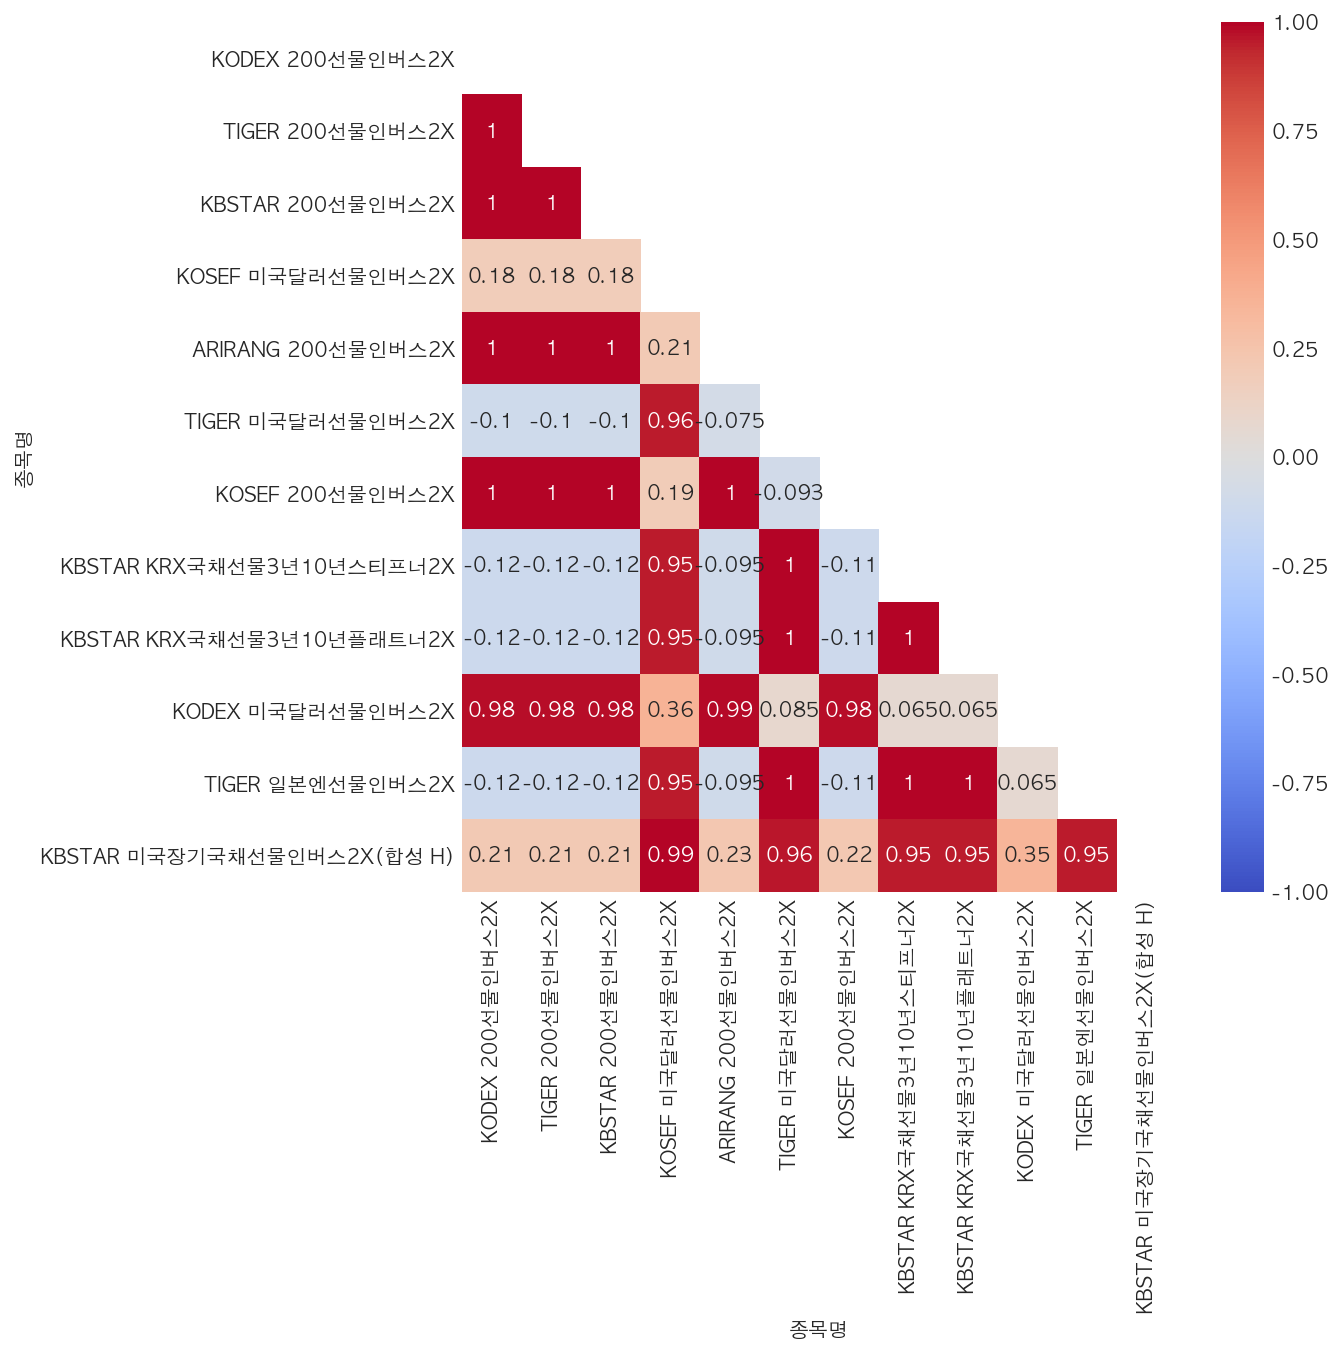

In [125]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기
plt.figure(figsize=(8, 8))
sns.heatmap(etf_corr_2x, annot=True, cmap="coolwarm", vmax=1, vmin=-1, mask=mask_2x)

### 원유와 관련된 ETF의 상관계수 보기

In [126]:
# 원유가 들어가는 상관계수만 가져오기
etf_corr_oil = etf_corr.filter(regex="원유").filter(regex="원유", axis=0)

In [127]:
# np.ones_like로 heatmap의 마스크값 구하기
mask_oil = np.triu(np.ones_like(etf_corr_oil))

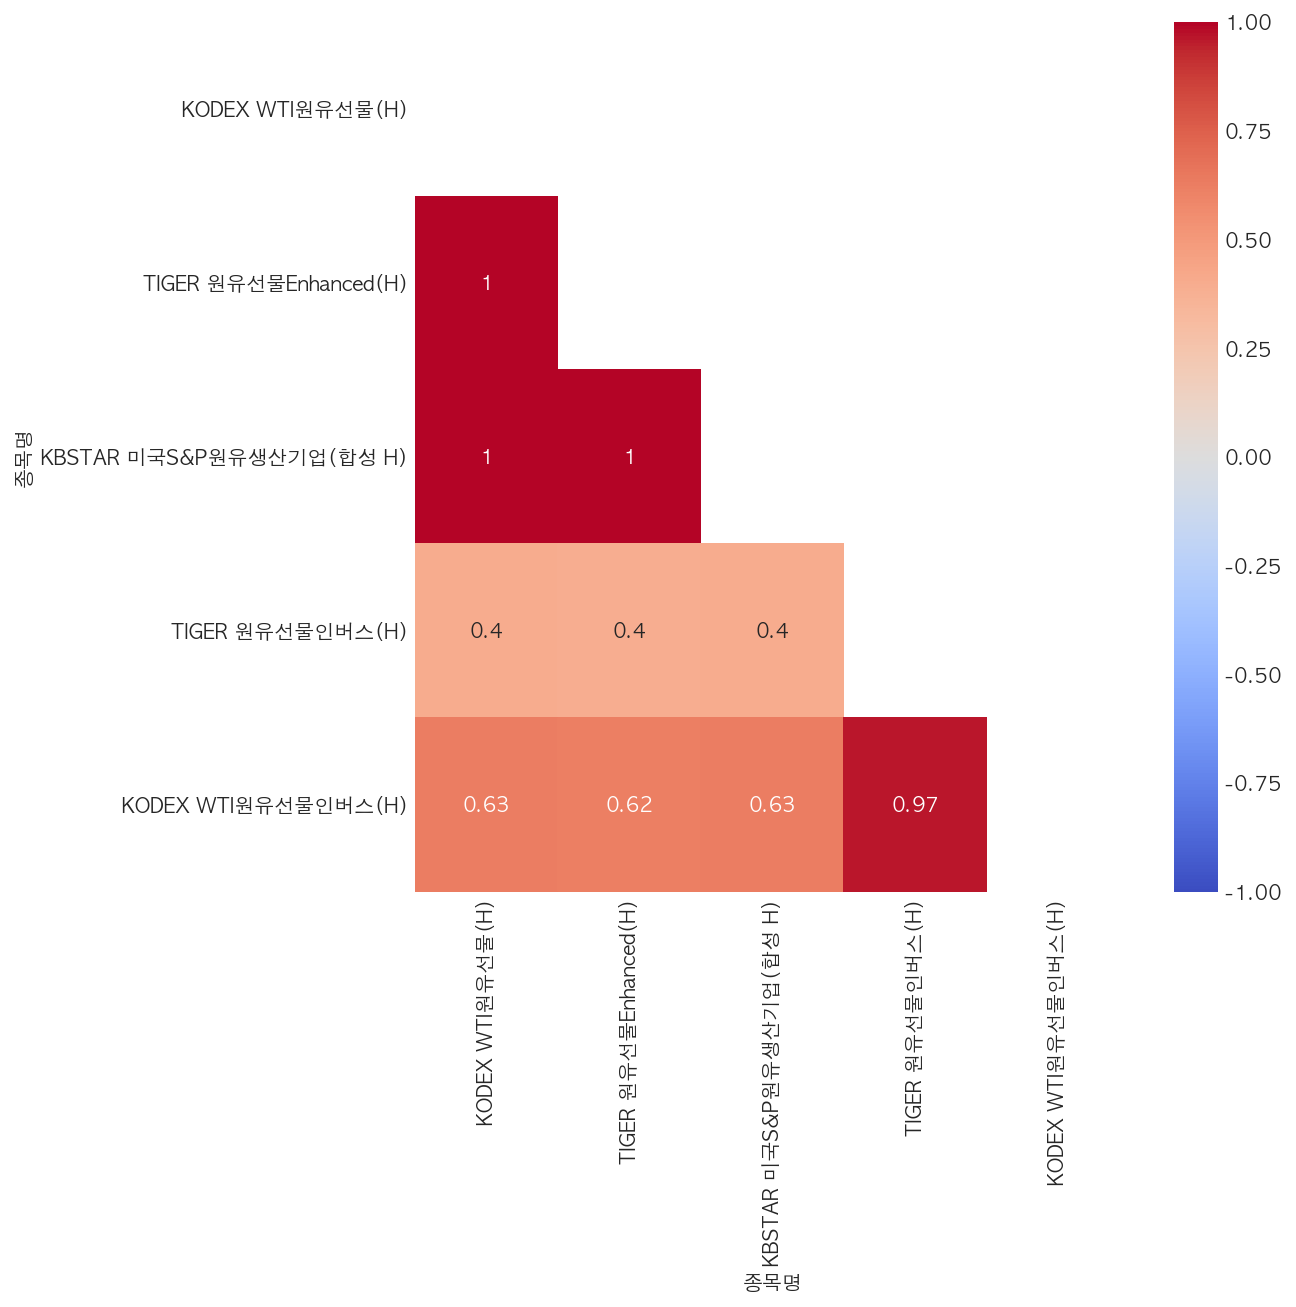

In [128]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기

plt.figure(figsize=(8, 8))
sns.heatmap(etf_corr_oil, annot=True, cmap="coolwarm", vmax=1, vmin=-1, mask=mask_oil)

## seaborn 공식문서

* seaborn 에 대해 좀 더 알고 싶다면 다음의 튜토리얼을 참고해 보세요.
* [User guide and tutorial — seaborn documentation](https://seaborn.pydata.org/tutorial.html)